In [36]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

In [37]:
highLumi = pd.read_hdf("data_highLumi_pt_1000_1200.h5")
lowLumi = pd.read_hdf("data_lowLumi_pt_1000_1200.h5")
print(lowLumi.keys())
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
background = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
signal = pickle.load(file2)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


#### 1. High luminosity data
For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.

Evaluate observed significance and compare your results to expectation.

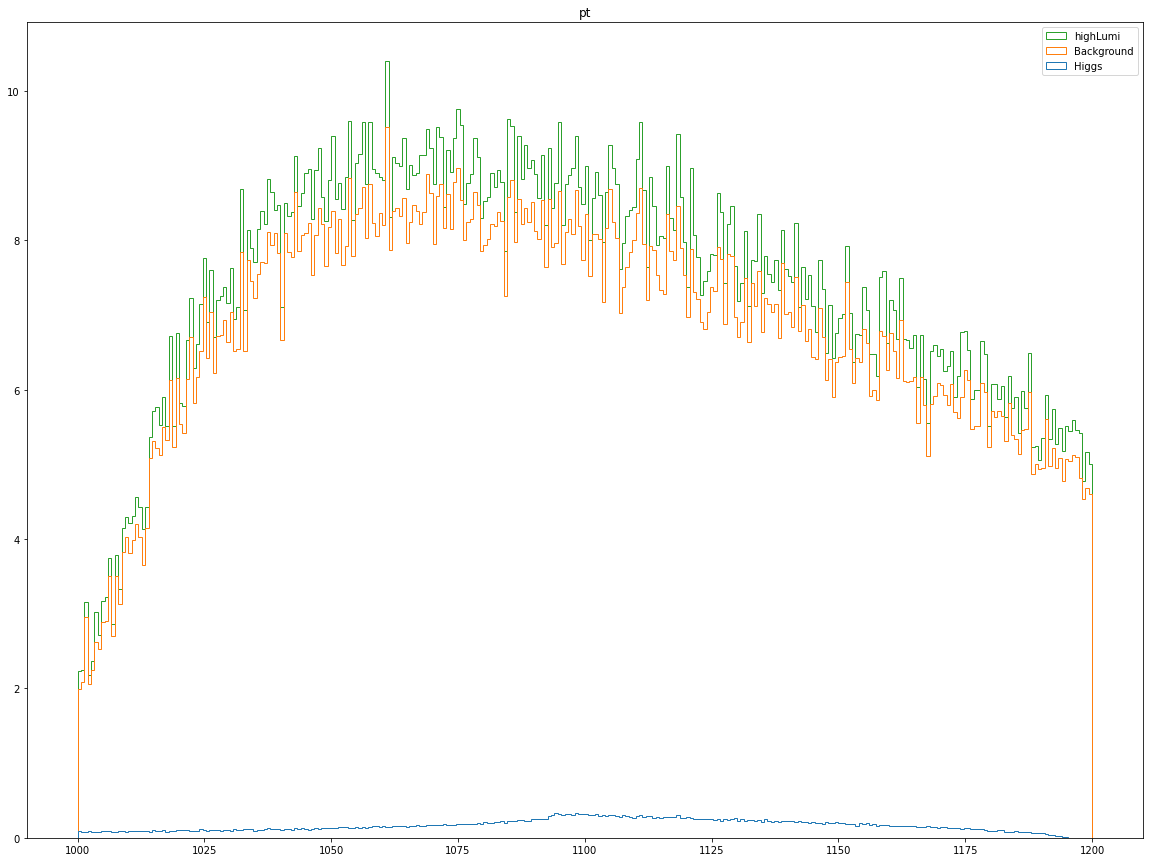

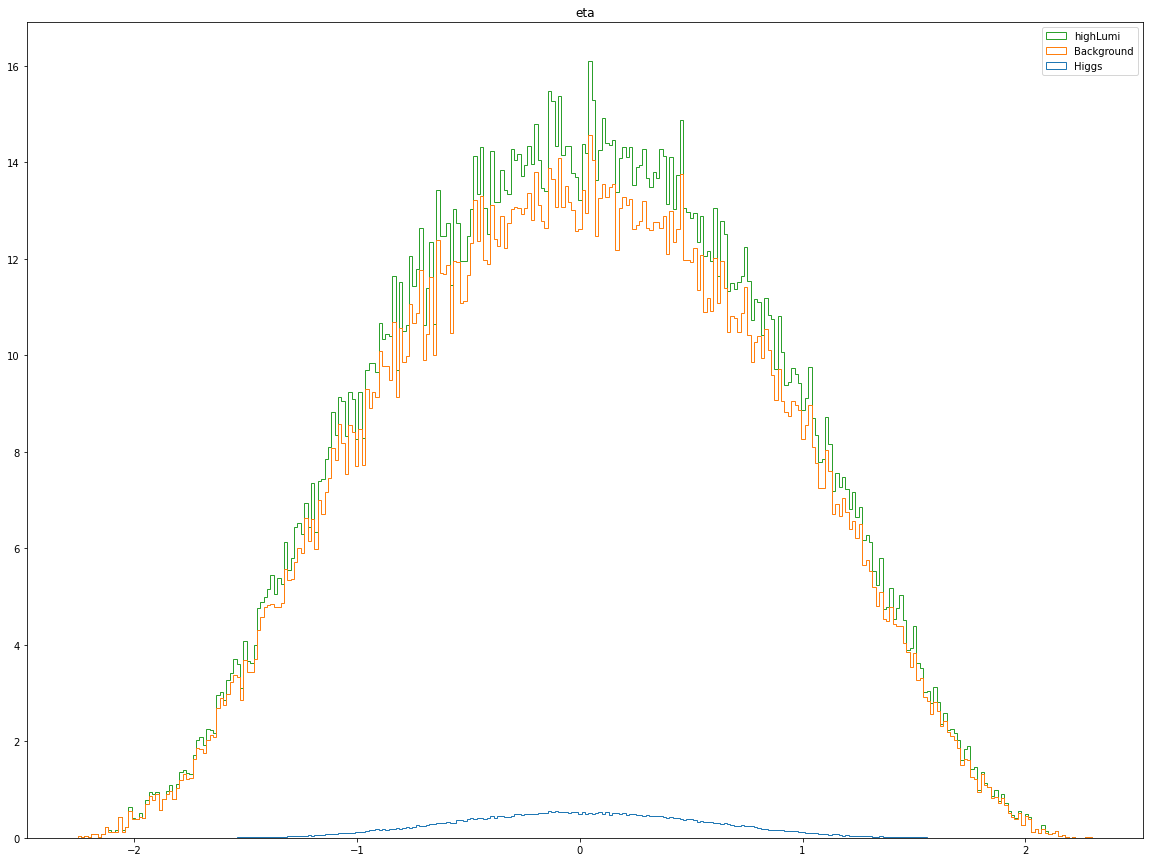

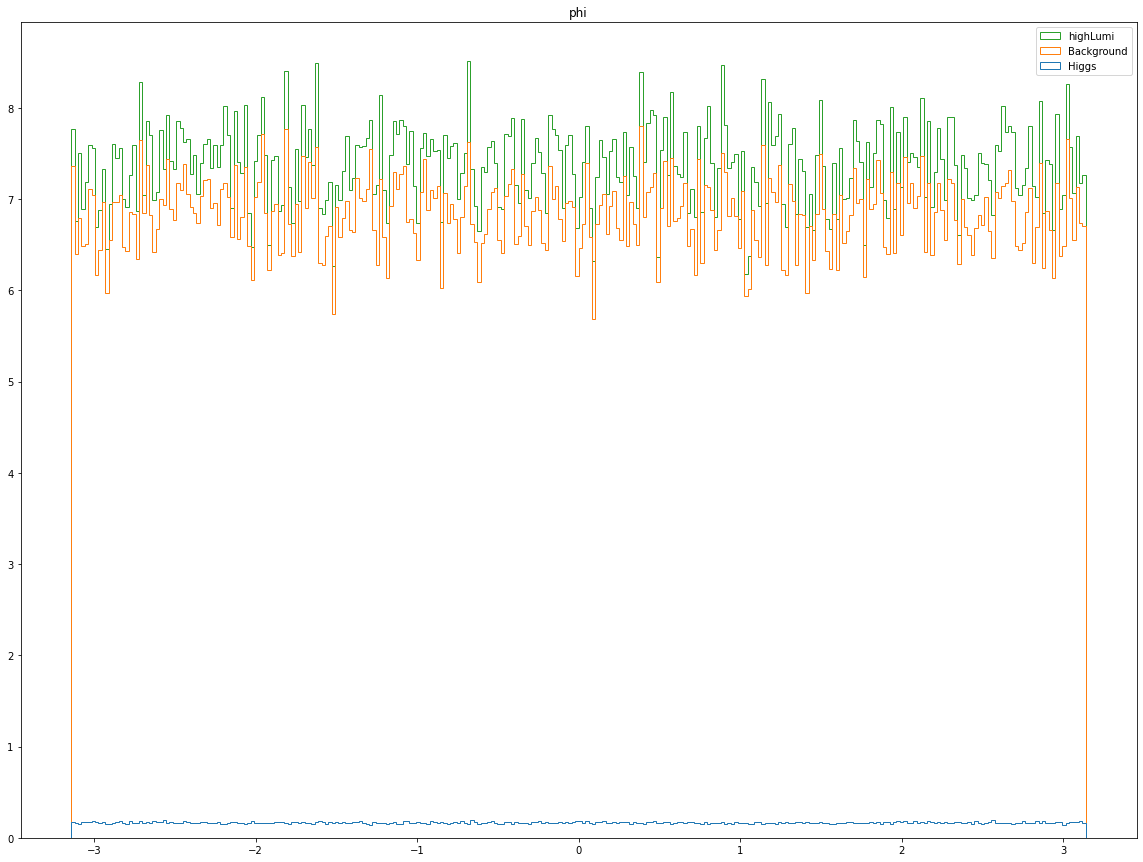

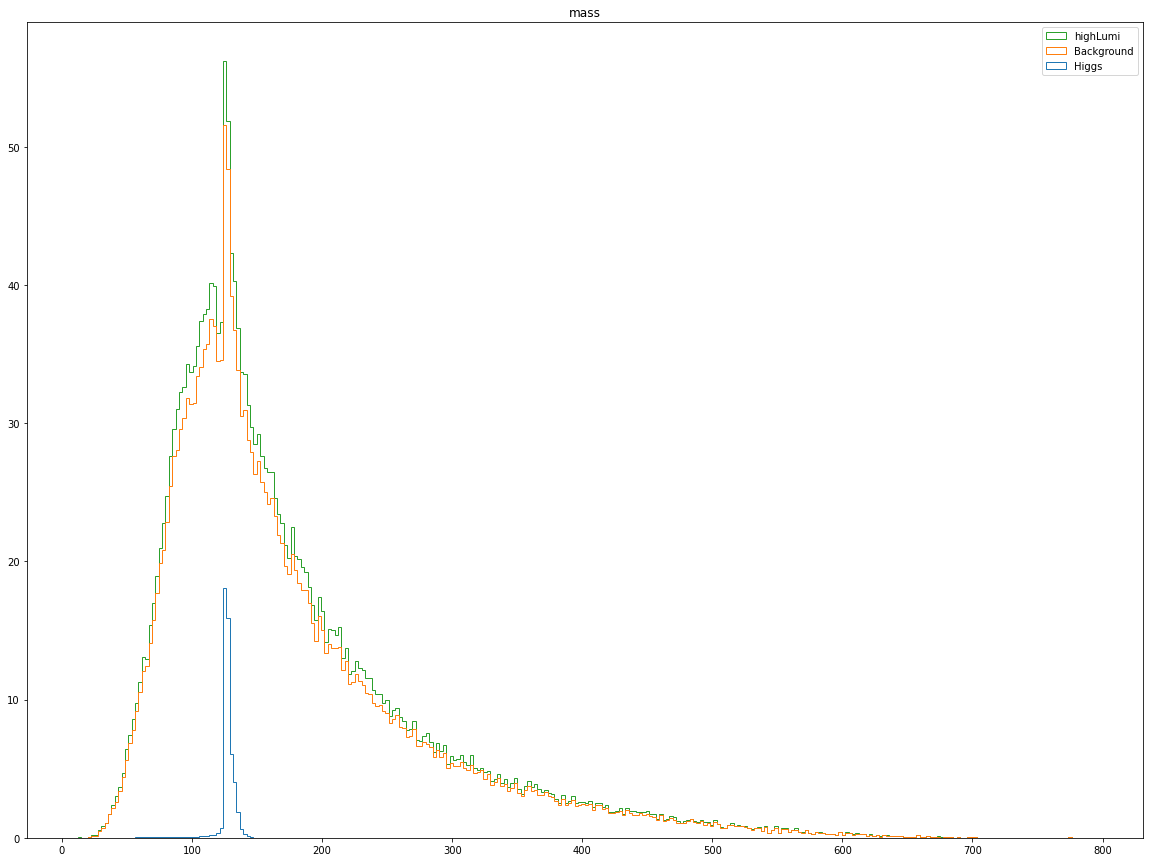

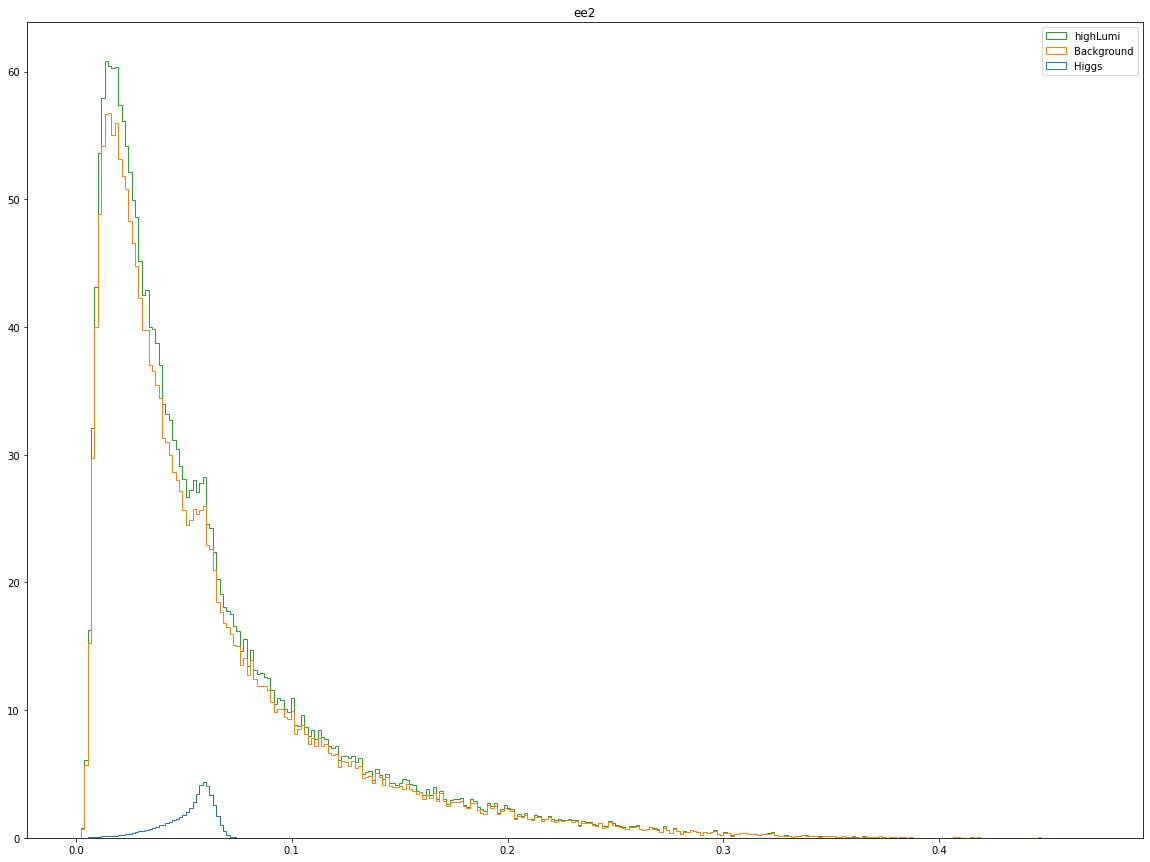

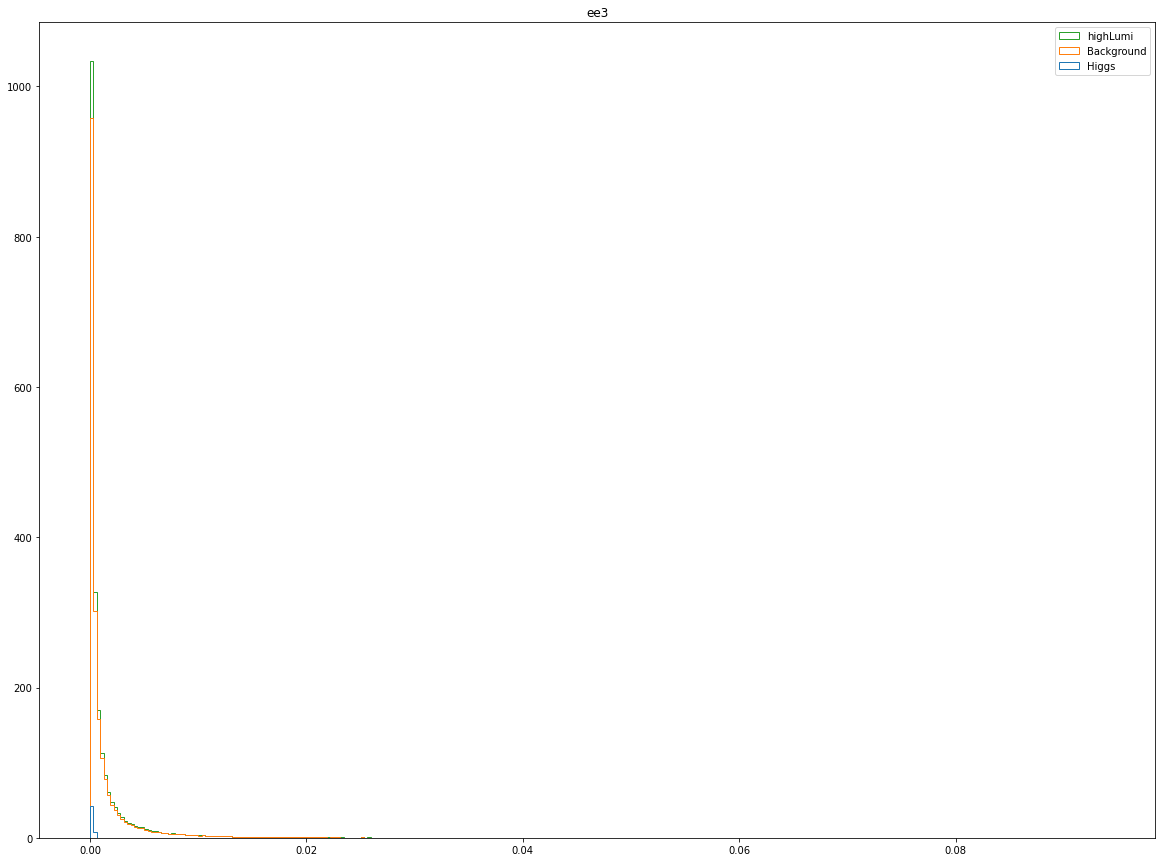

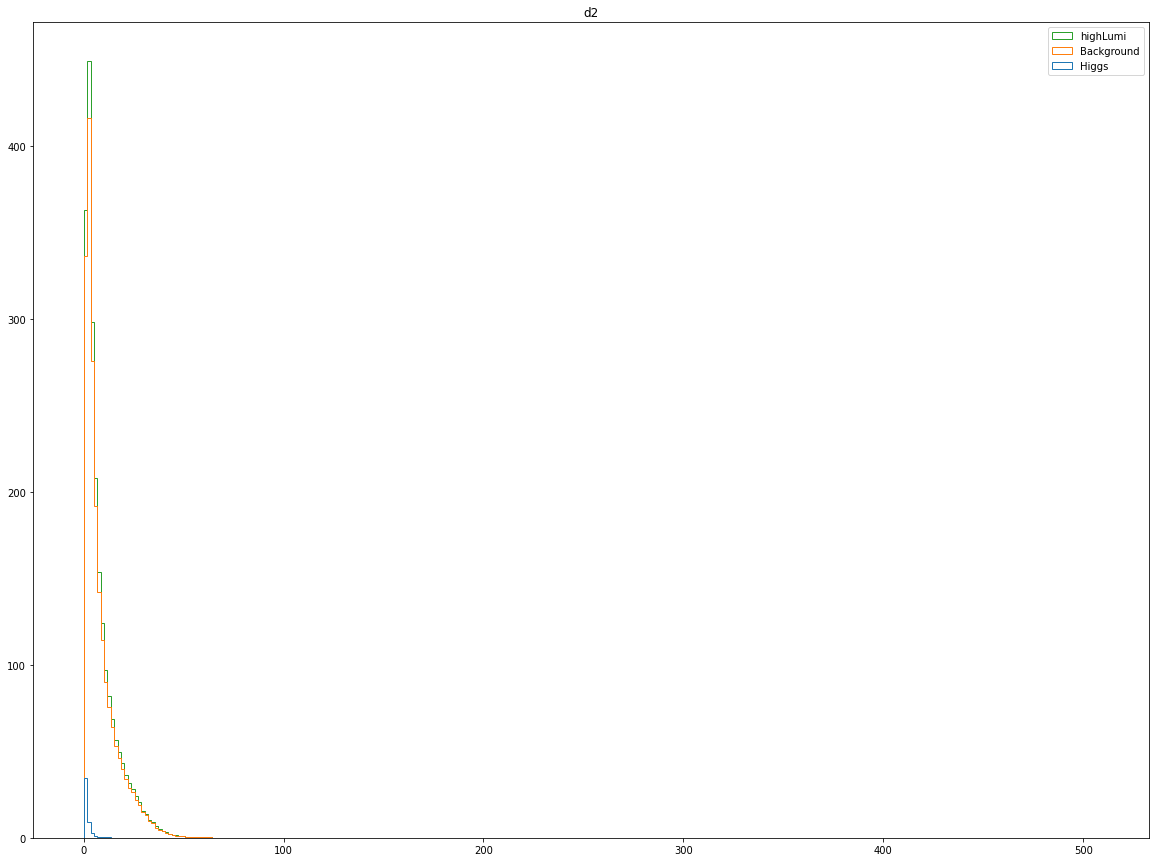

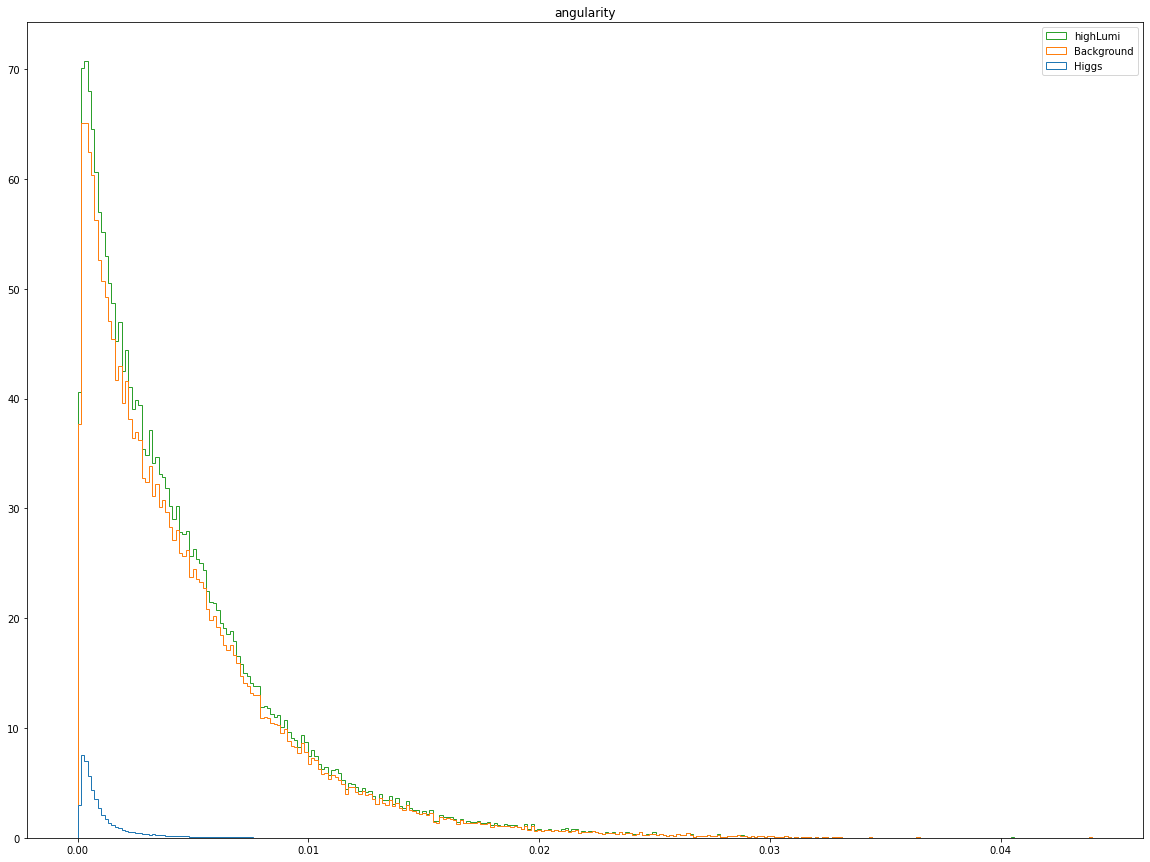

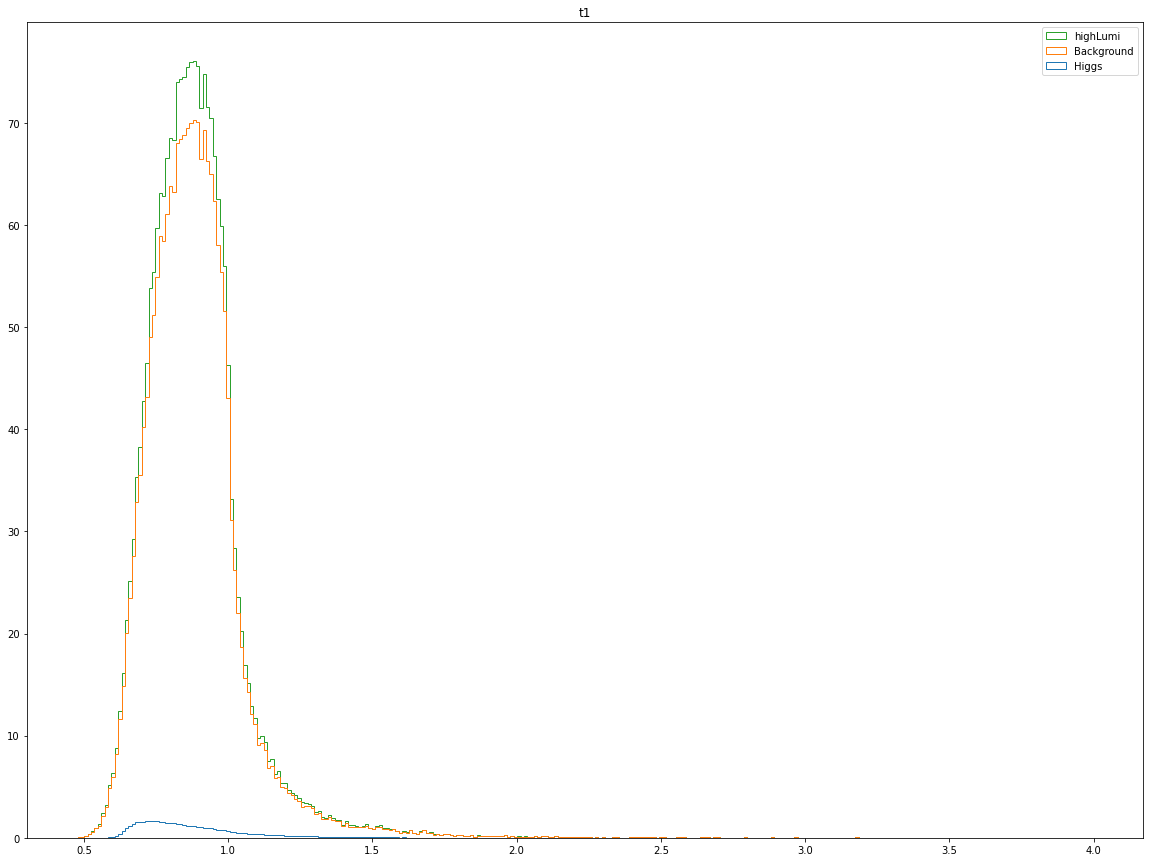

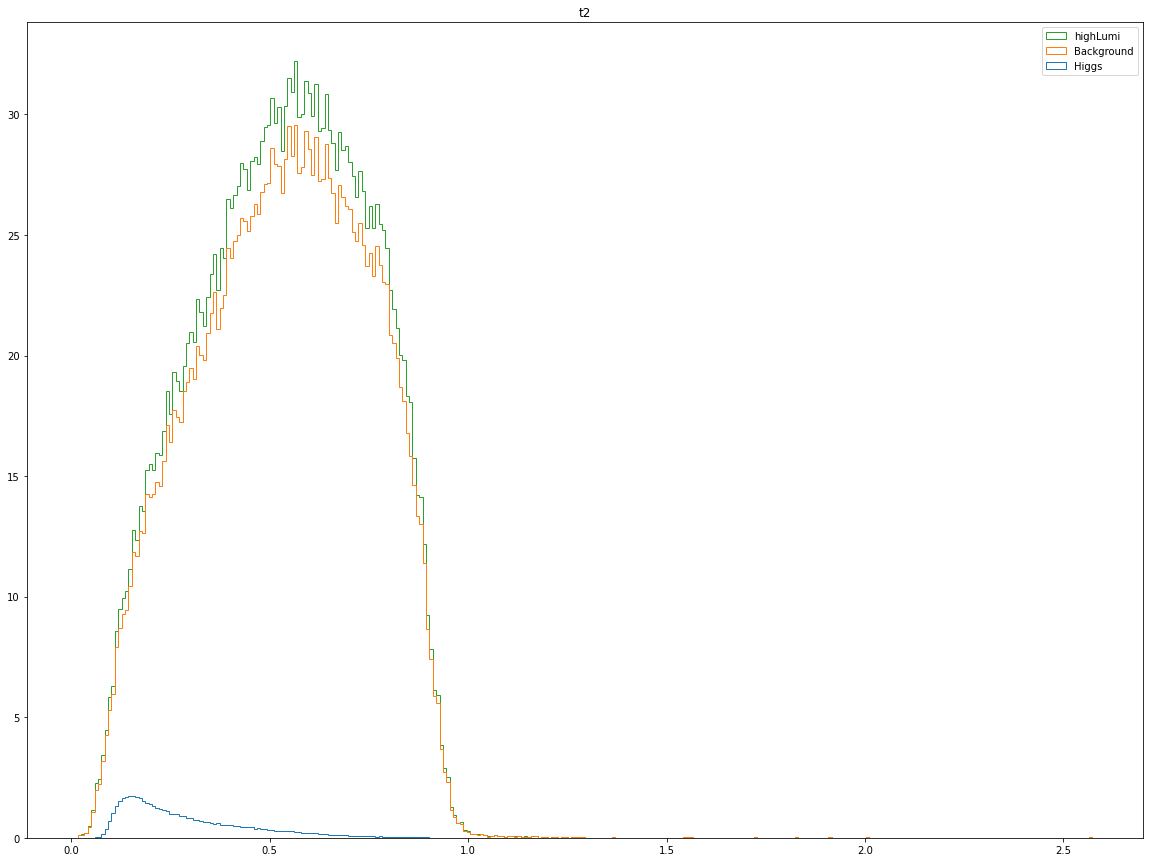

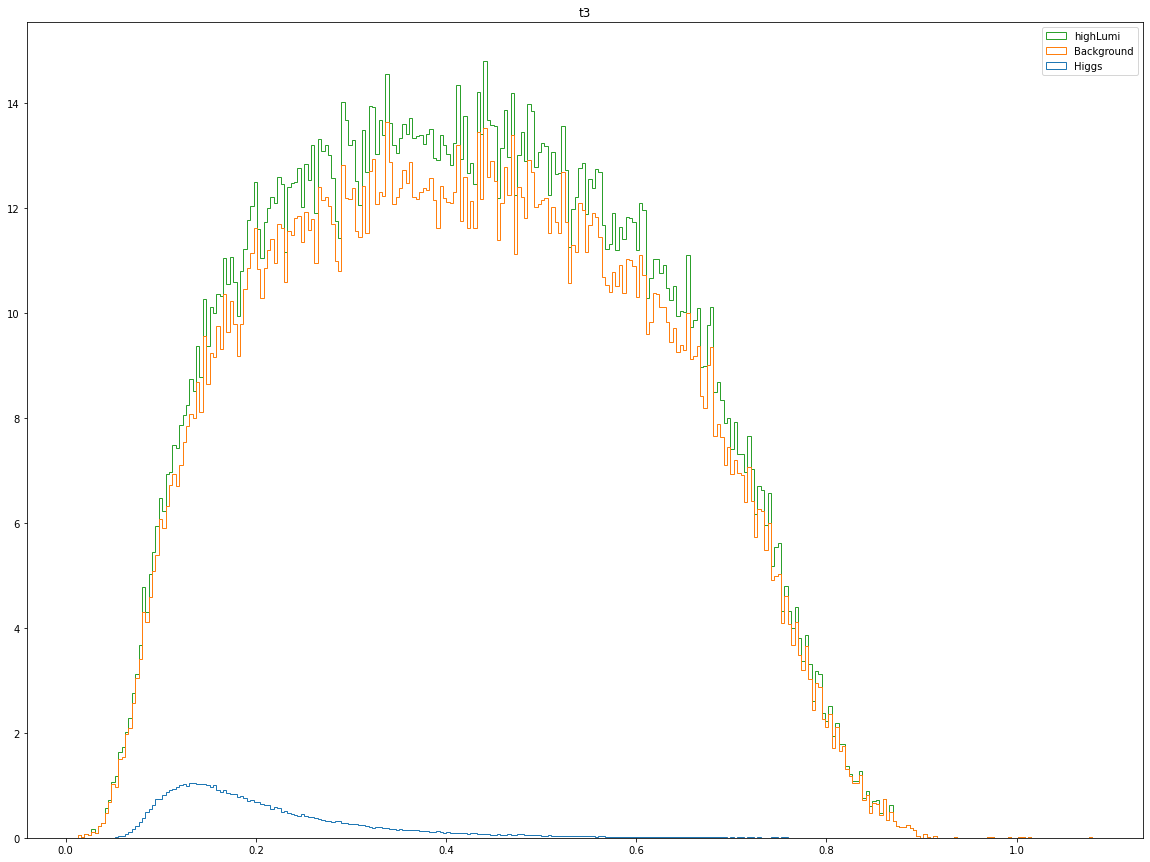

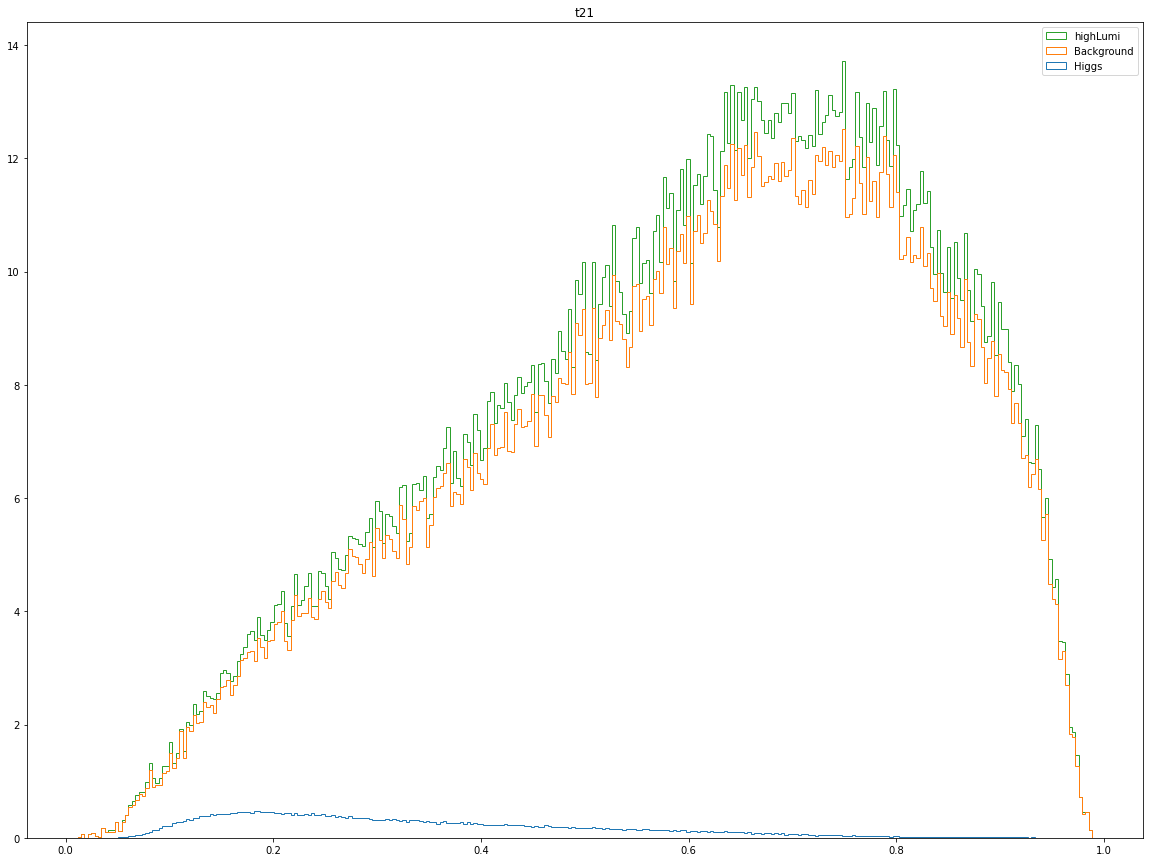

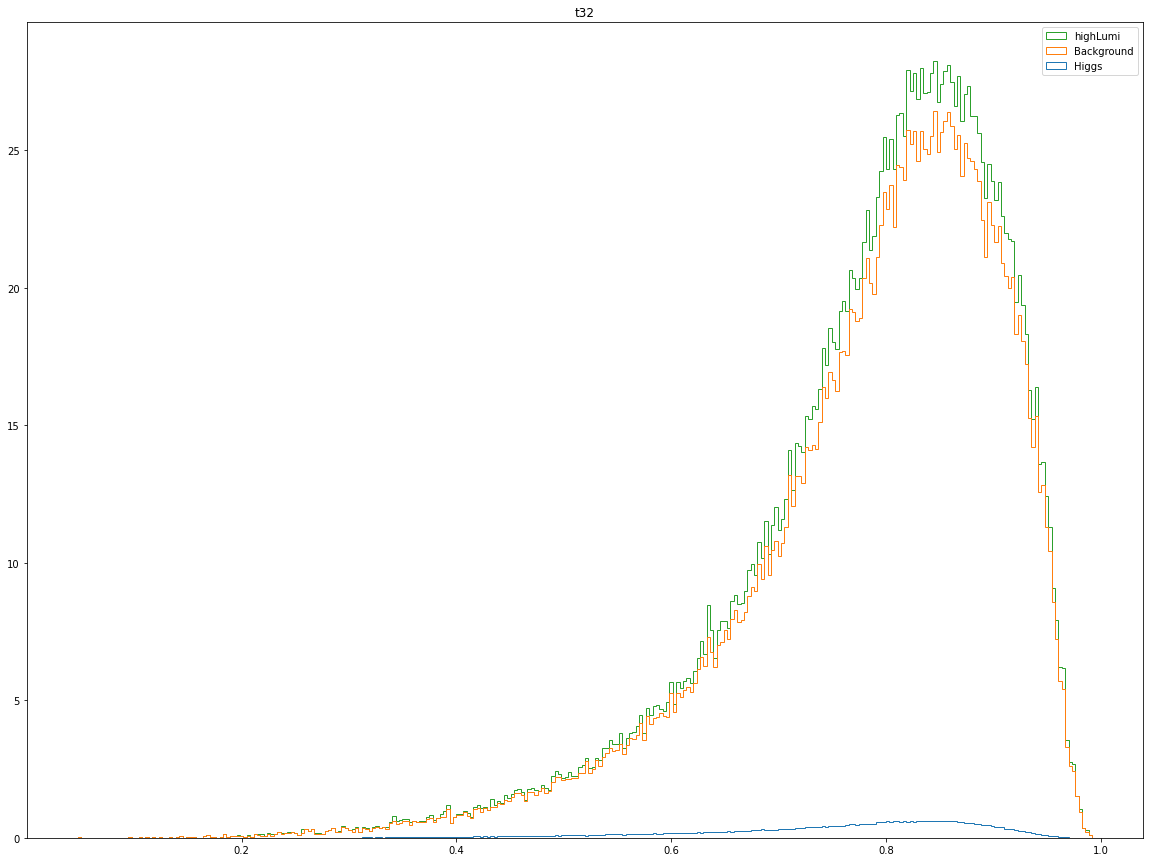

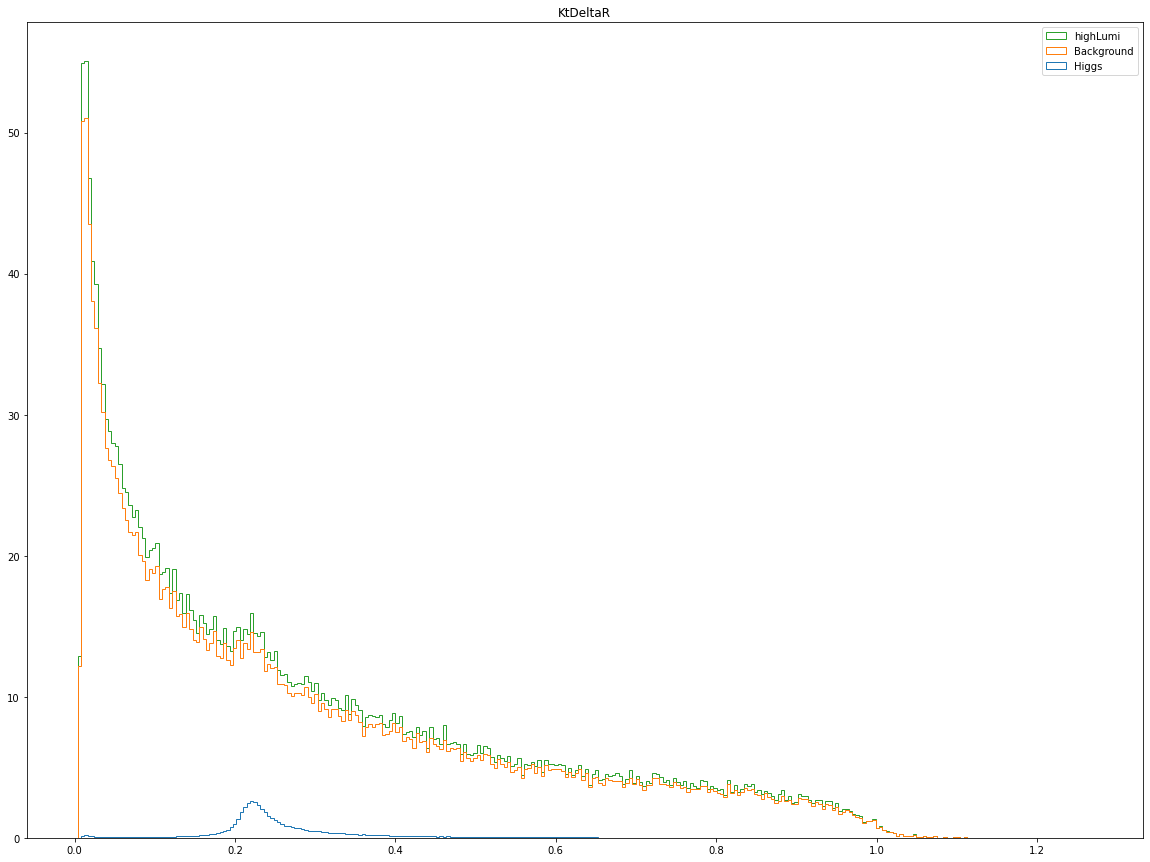

In [38]:
def plotWithoutCuts(key):
    x= [signal[key], background[key], highLumi[key]]
    dataweights = [[.0005]*len(signal[key]), [.02]*len(background[key]), [.04]*len(highLumi[key])]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Higgs","Background", "highLumi"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithoutCuts(key)

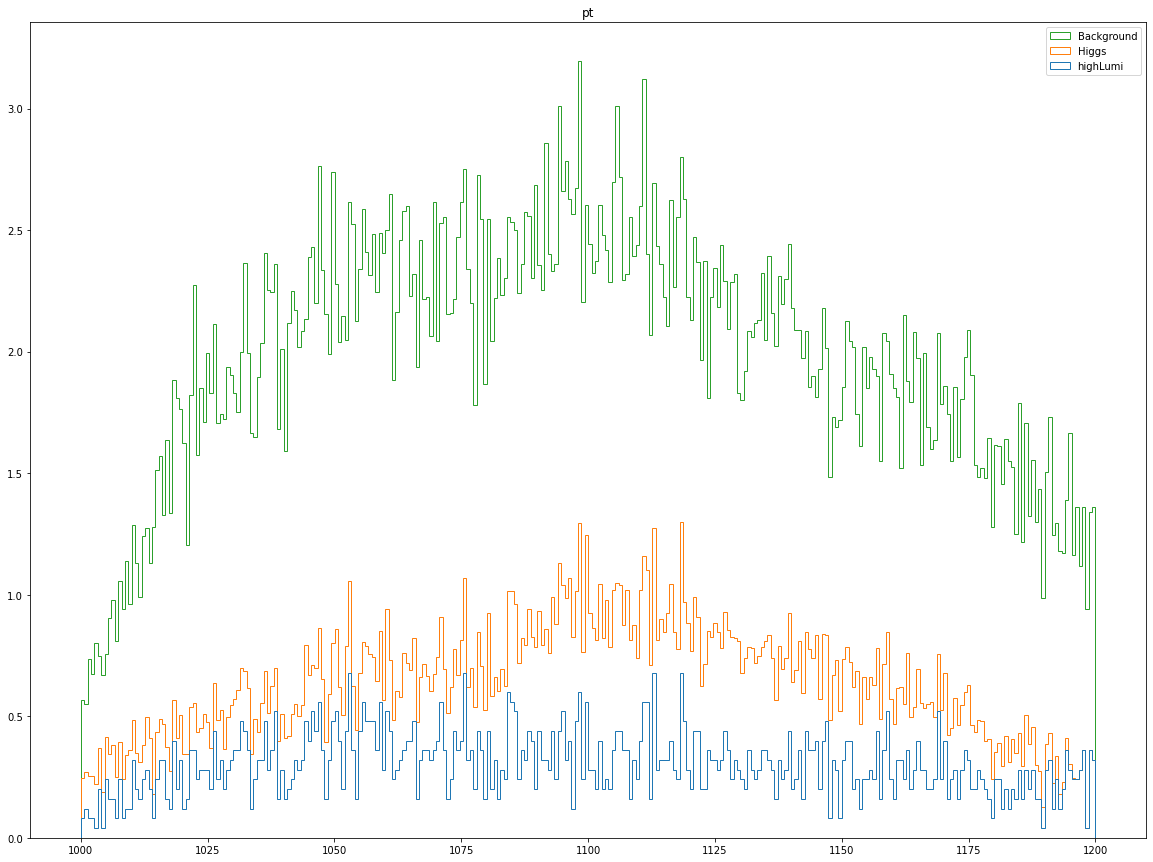

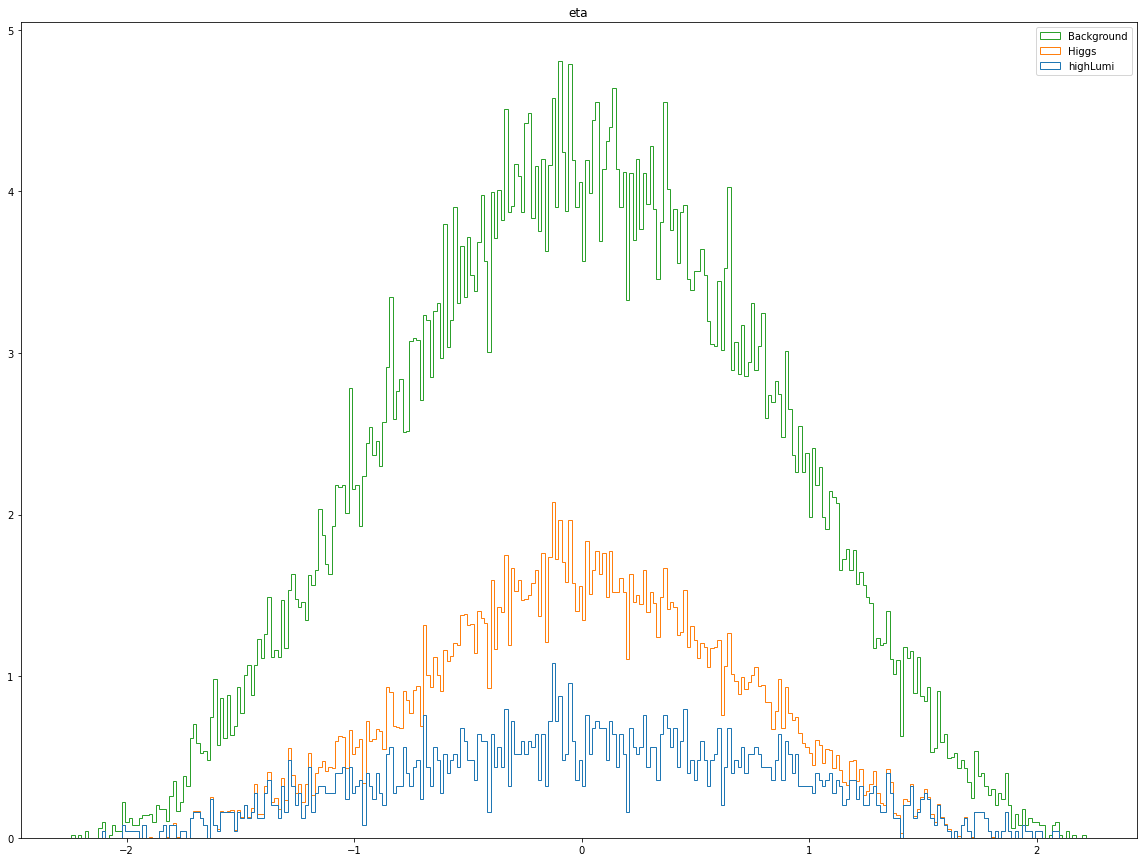

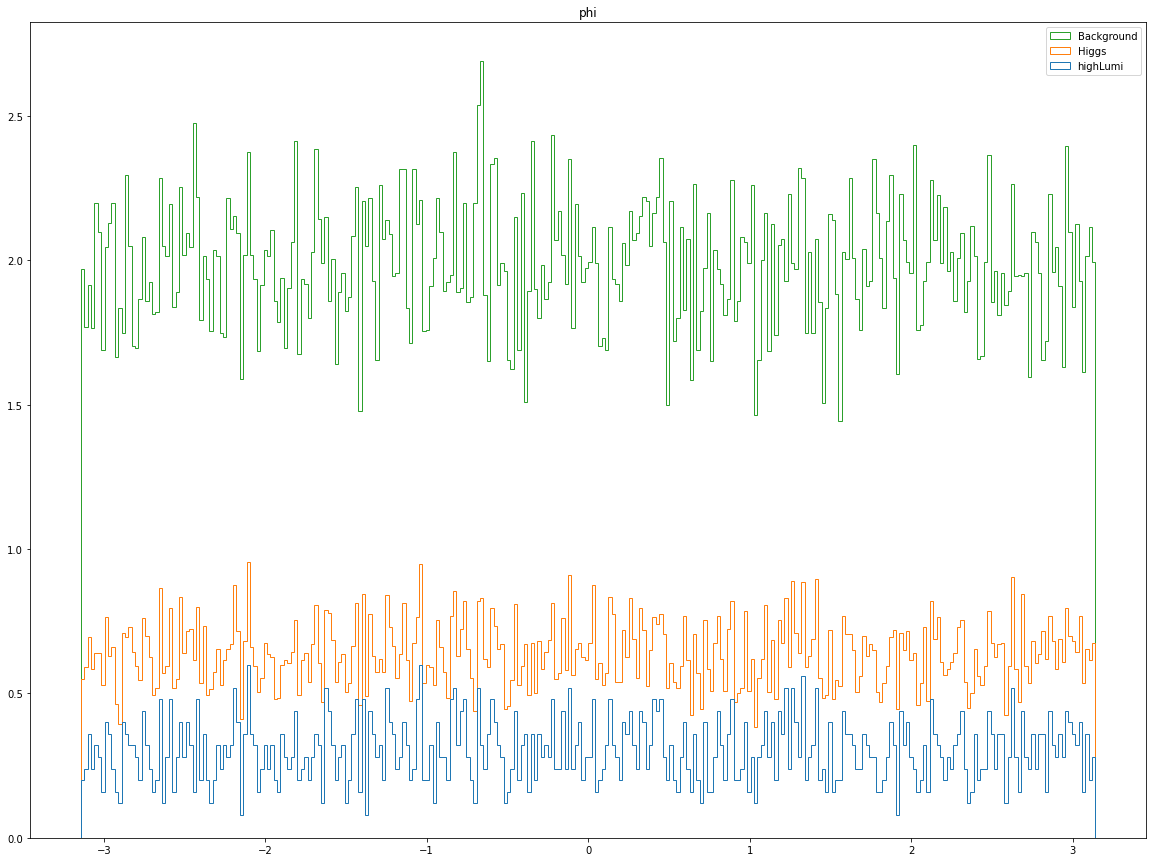

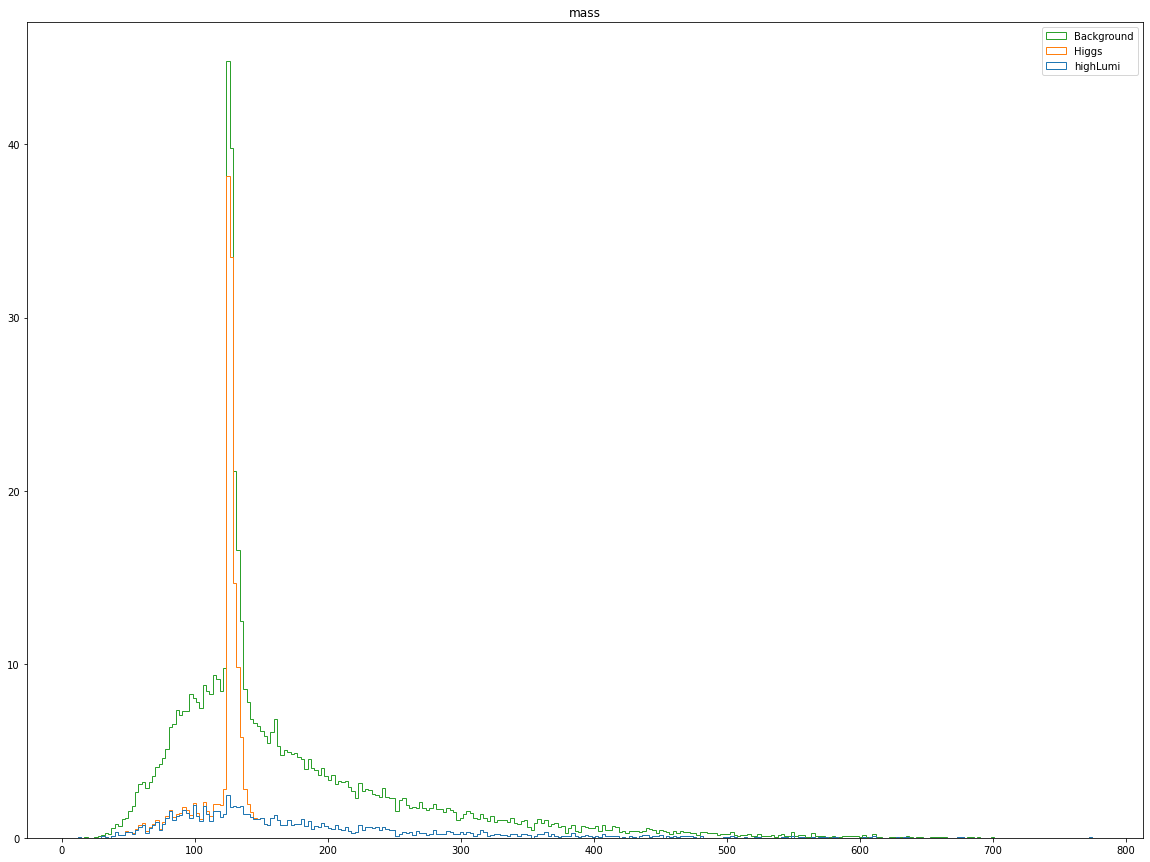

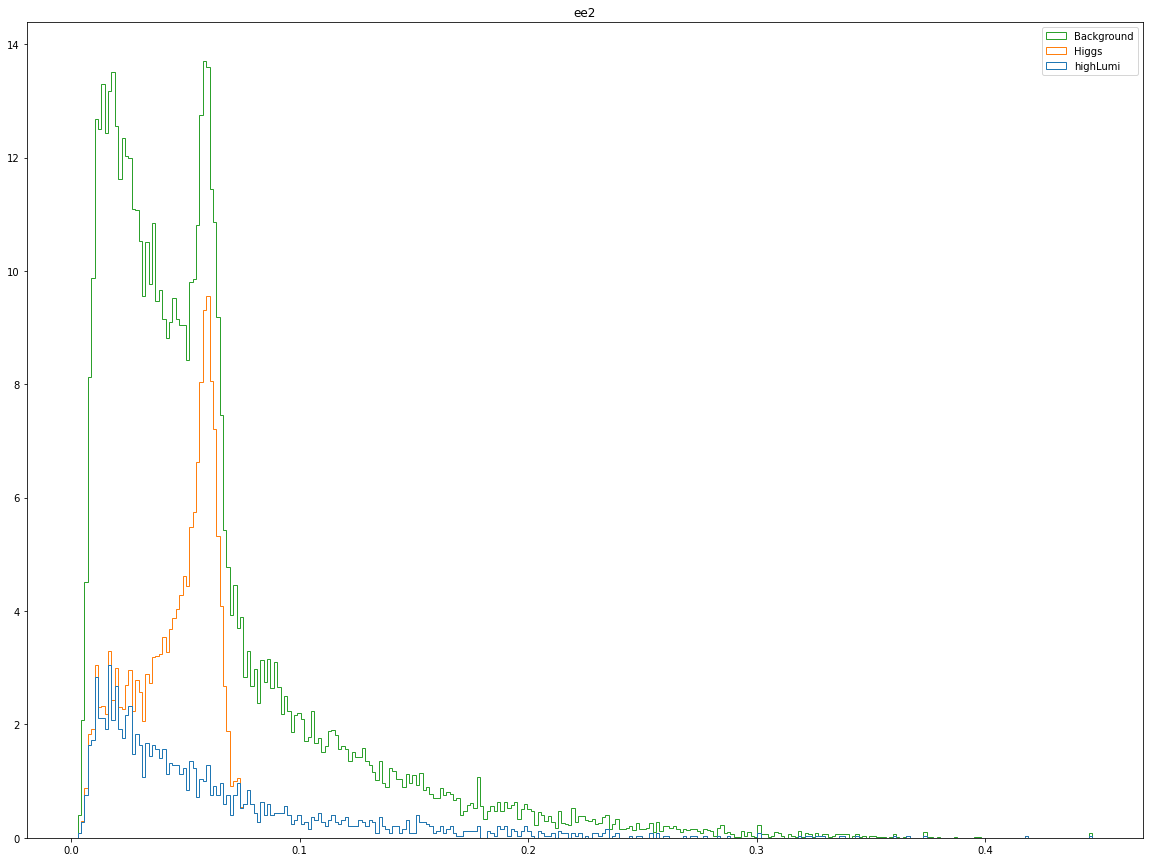

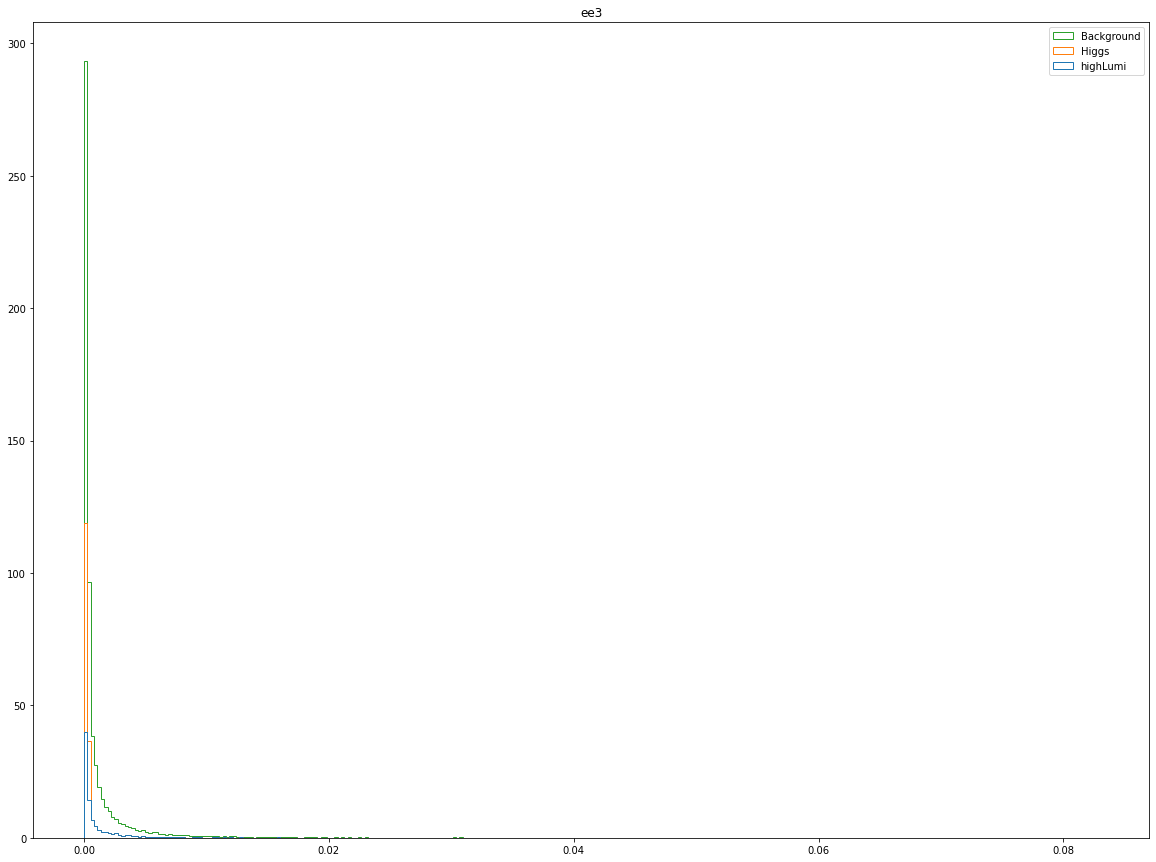

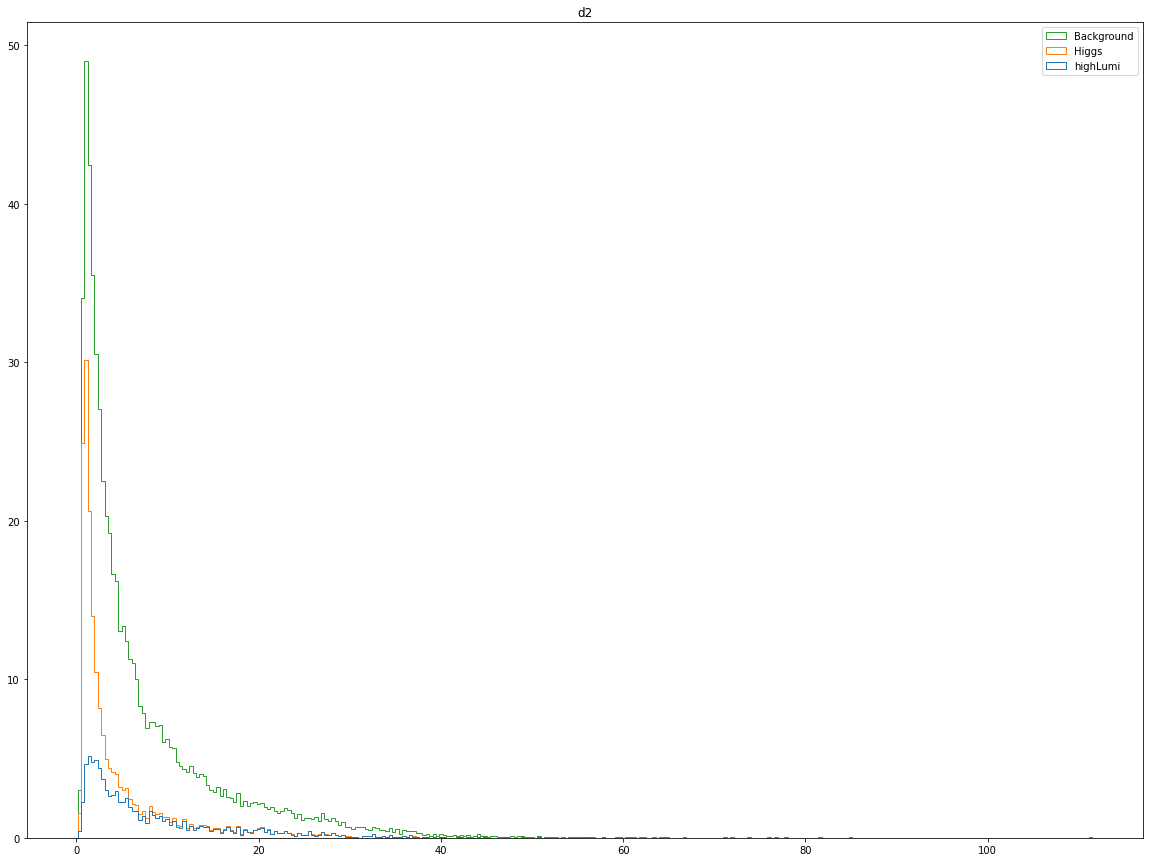

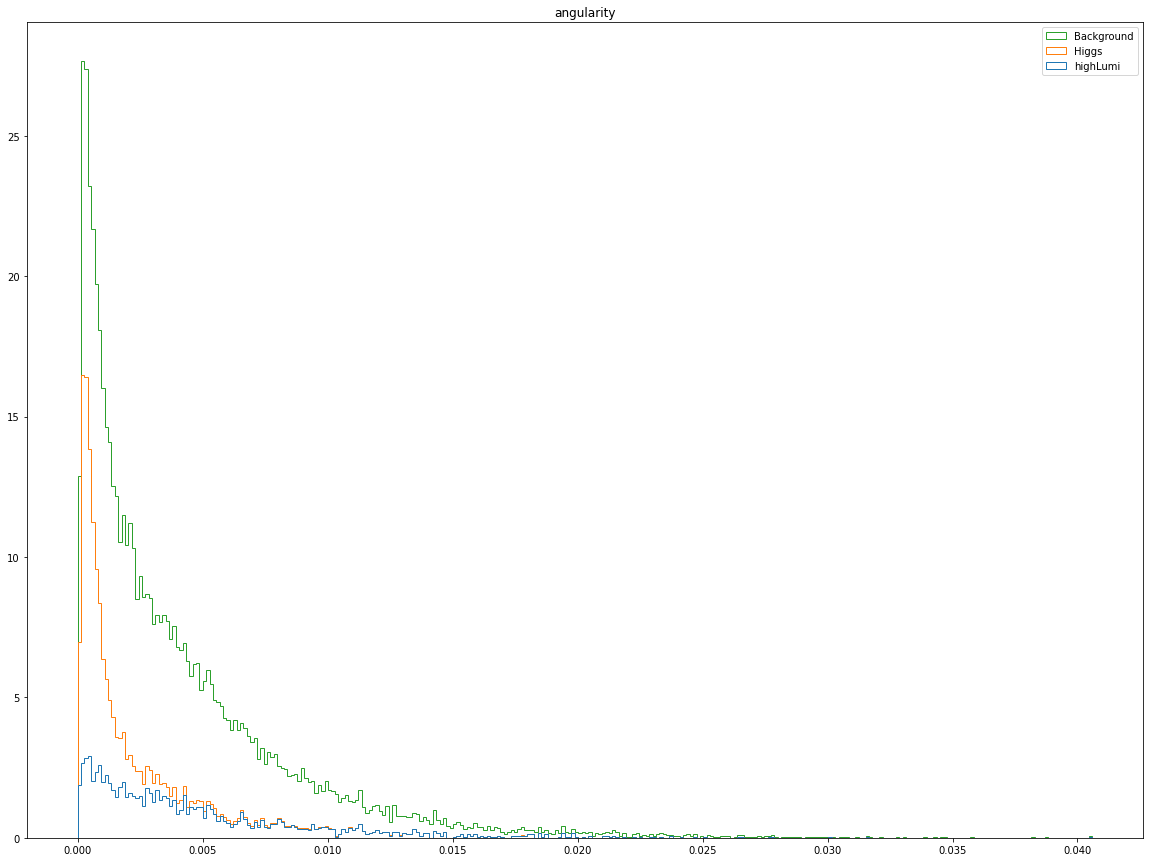

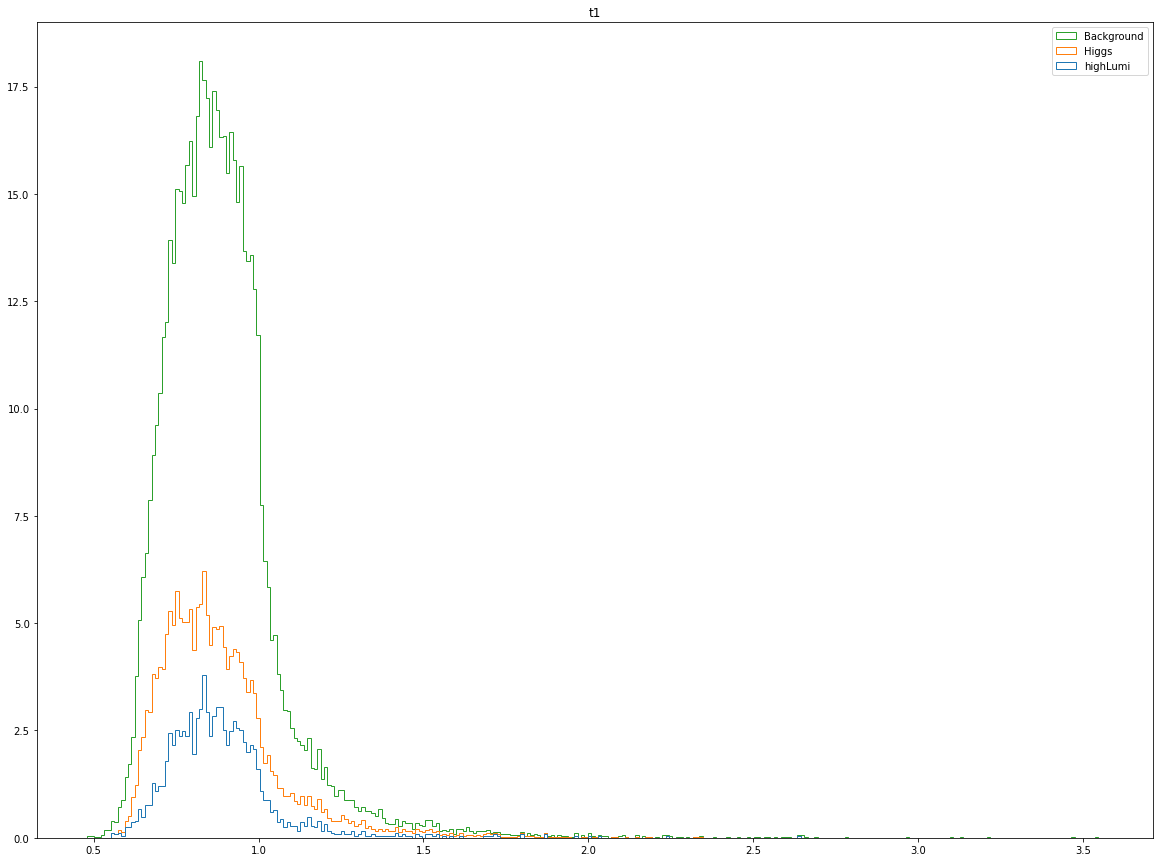

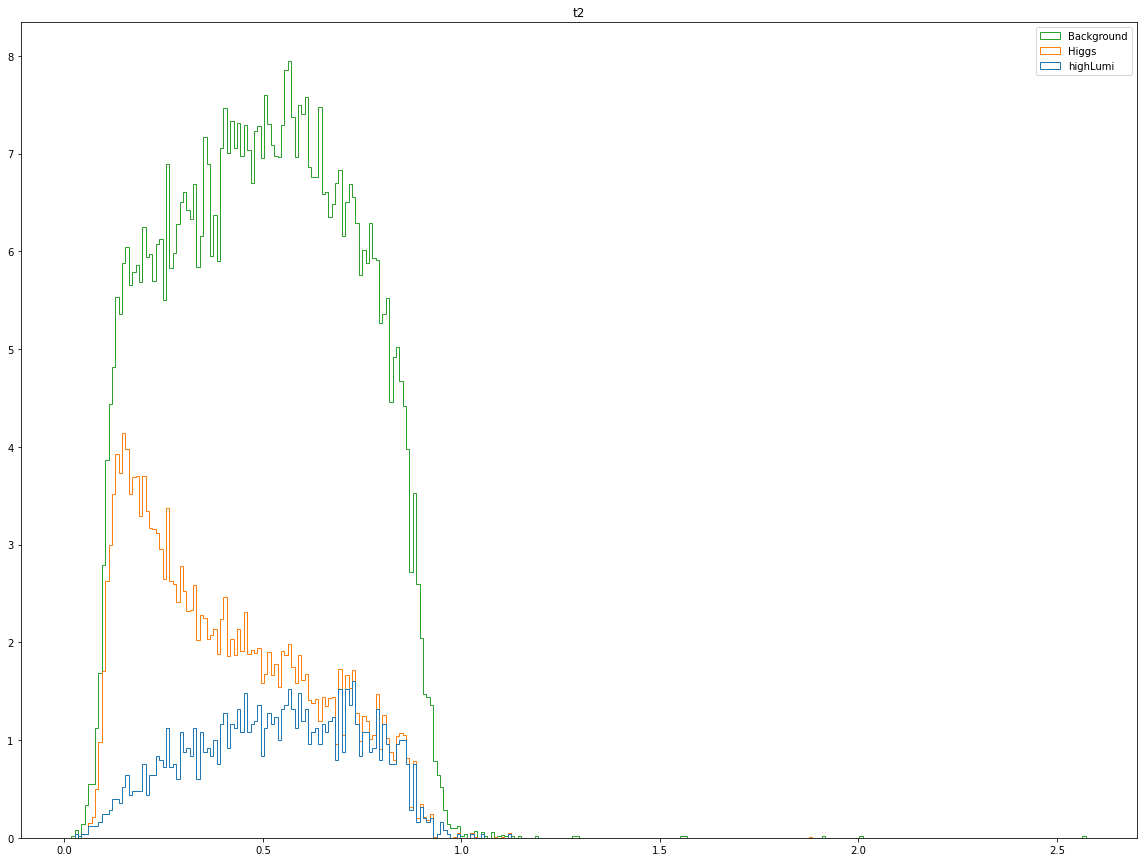

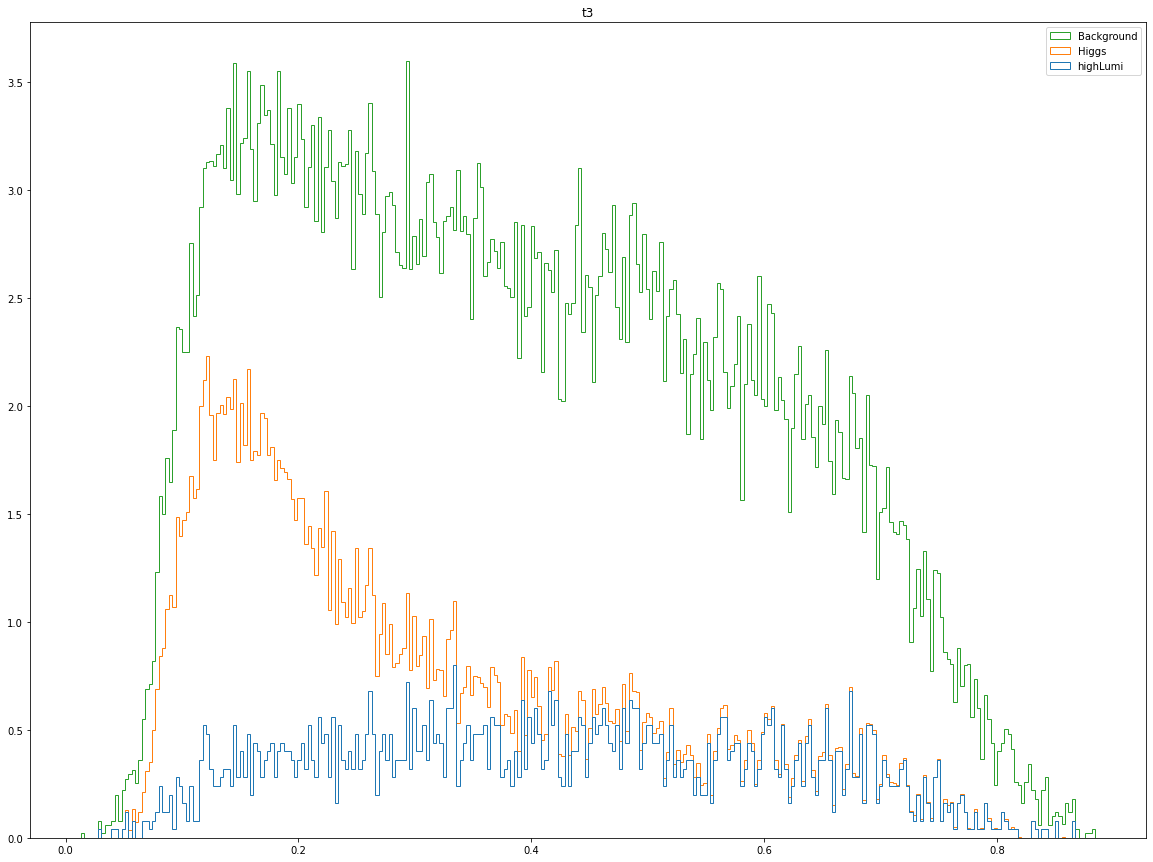

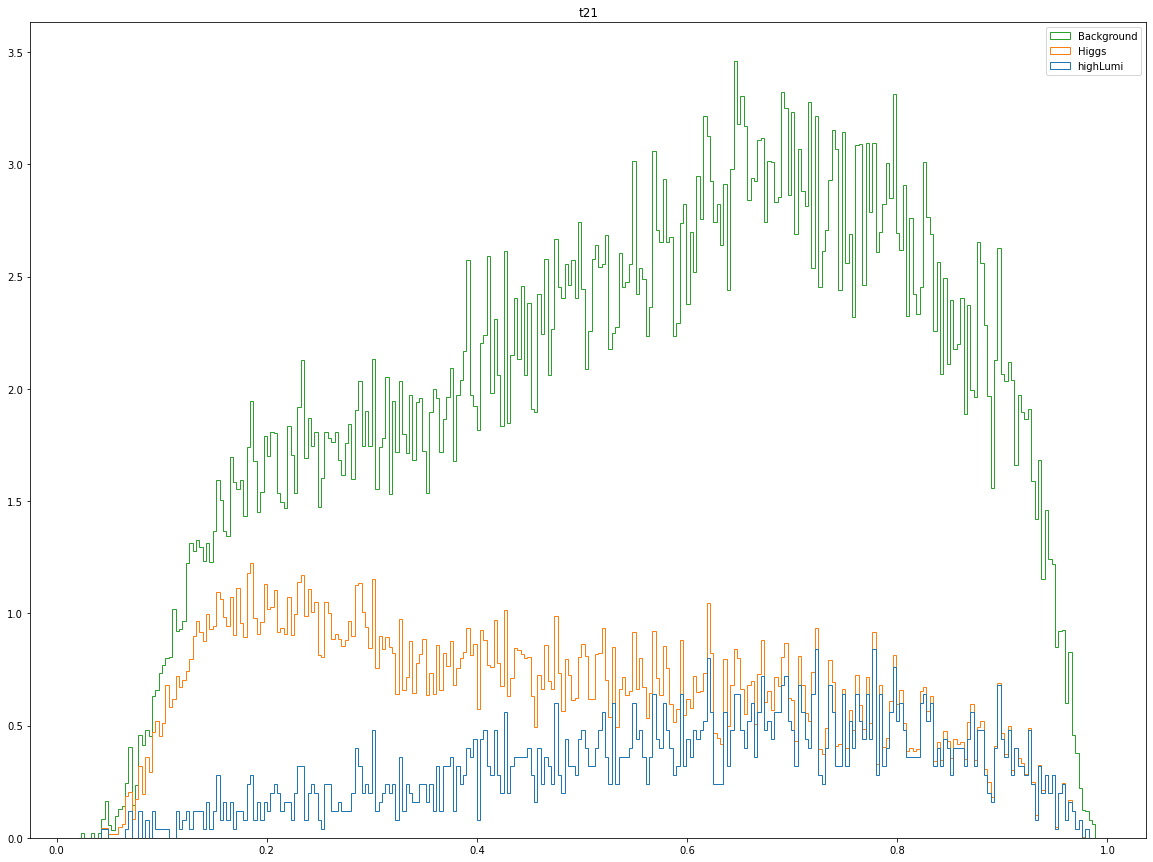

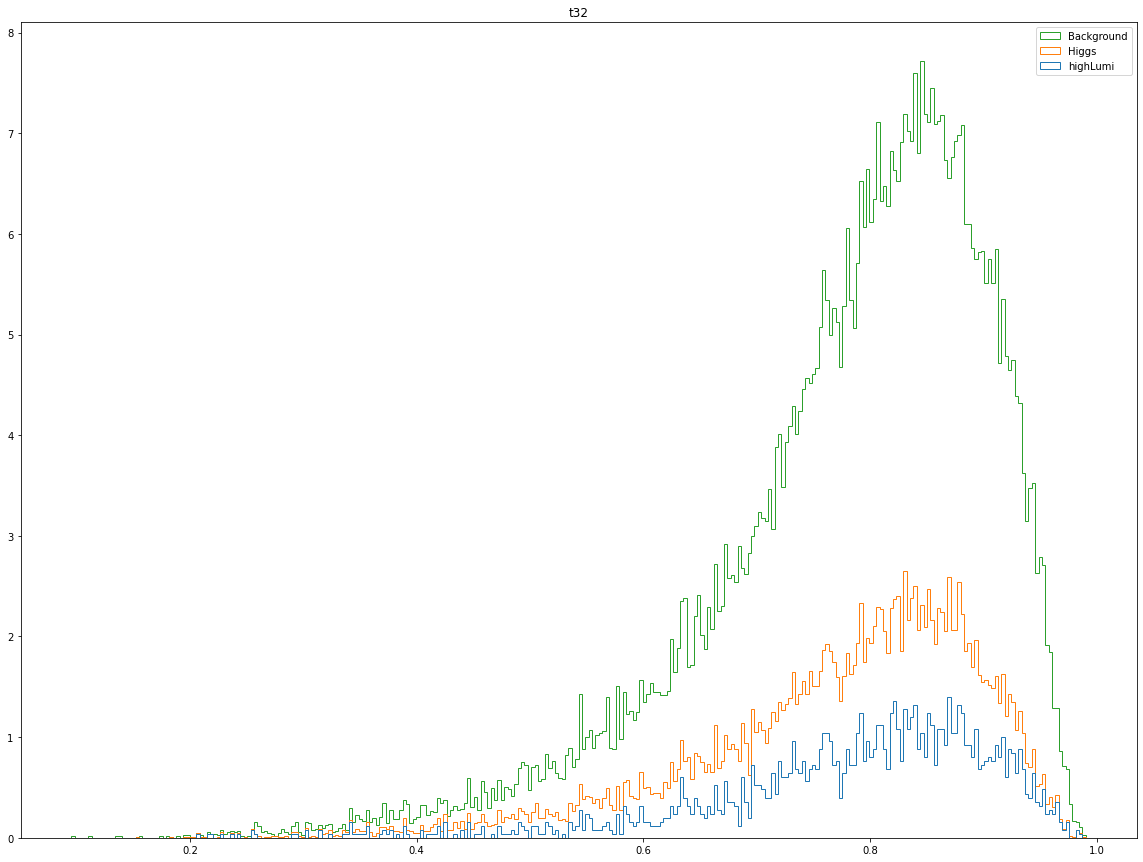

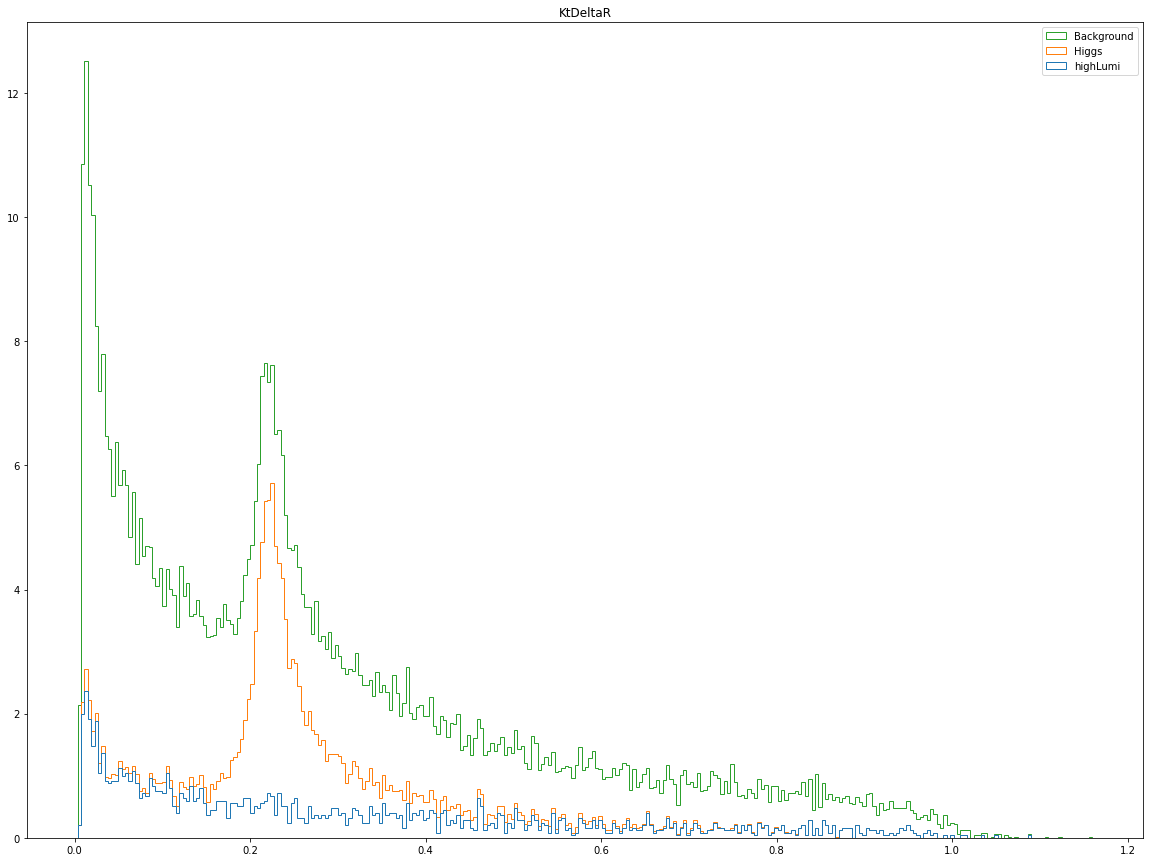

In [62]:
def slicer(lower, upper, key, signal, bkgd, expected):
    bkgd_n = bkgd[key]
    signal_n = signal[key]
    expected_n = expected[key]
    bkgd_slice = bkgd_n[lower:upper:1]
    signal_slice = signal_n[lower:upper:1]
    exp_signal_slice = expected_n[lower:upper:1]
    
    bkgd_avg = 200000 * len(bkgd_slice)/len(bkgd_n)
    signal_avg = 5000 * len(signal_slice)/len(signal_n)
    exp_signal_avg = 5000 * len(signal_slice)/len(expected_n)
    
    p = (1-scipy.stats.poisson.cdf(bkgd_avg + signal_avg, bkgd_avg))

    return(signal_slice, exp_signal_slice, bkgd_slice)

def plotWithCuts(key):
    signal_slice, exp_signal_slice, background_slice = slicer(1800, 22000, key, highLumi, background, signal)
    x= [signal_slice, exp_signal_slice, background_slice]
    dataweights = [[.04]*len(signal_slice), [.005]*len(exp_signal_slice), [.02]*len(background_slice)]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("highLumi", "Higgs","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithCuts(key)

#### 2. Low luminosity data
Do as before with the high luminosity data and comment on the difference.

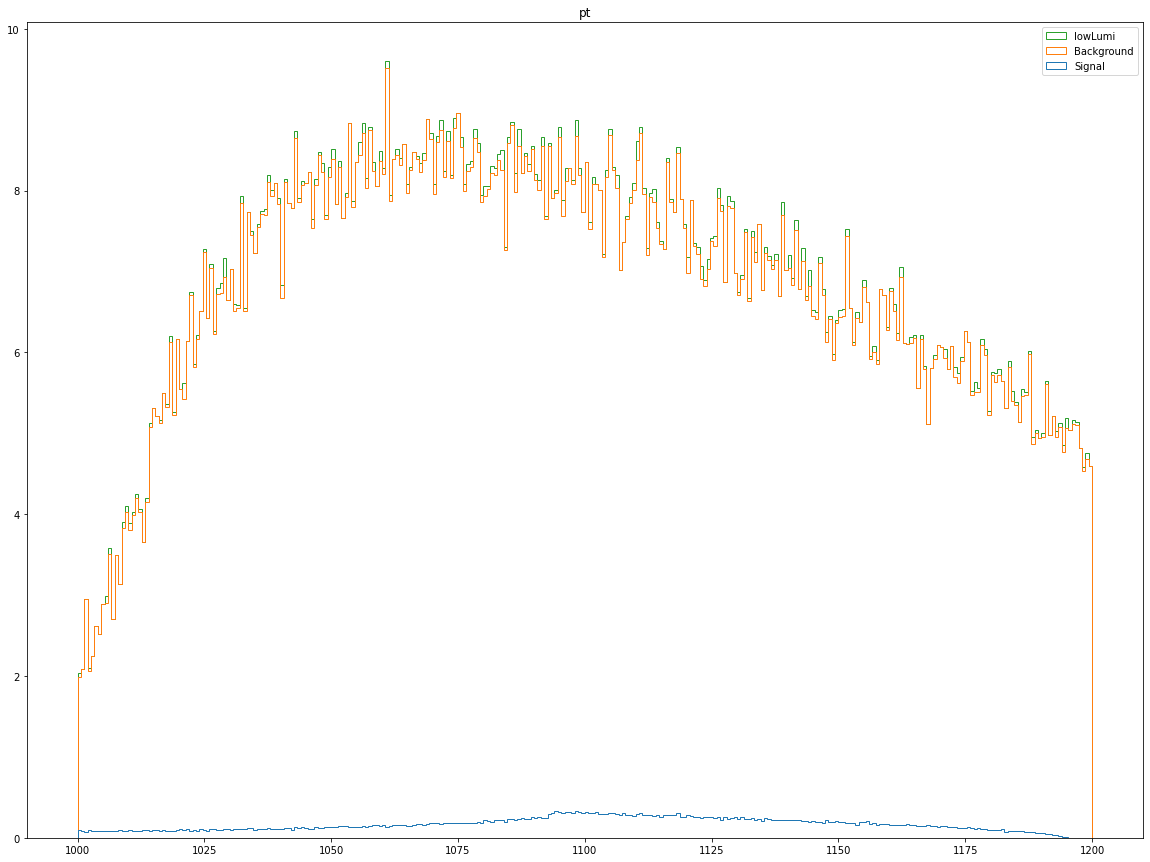

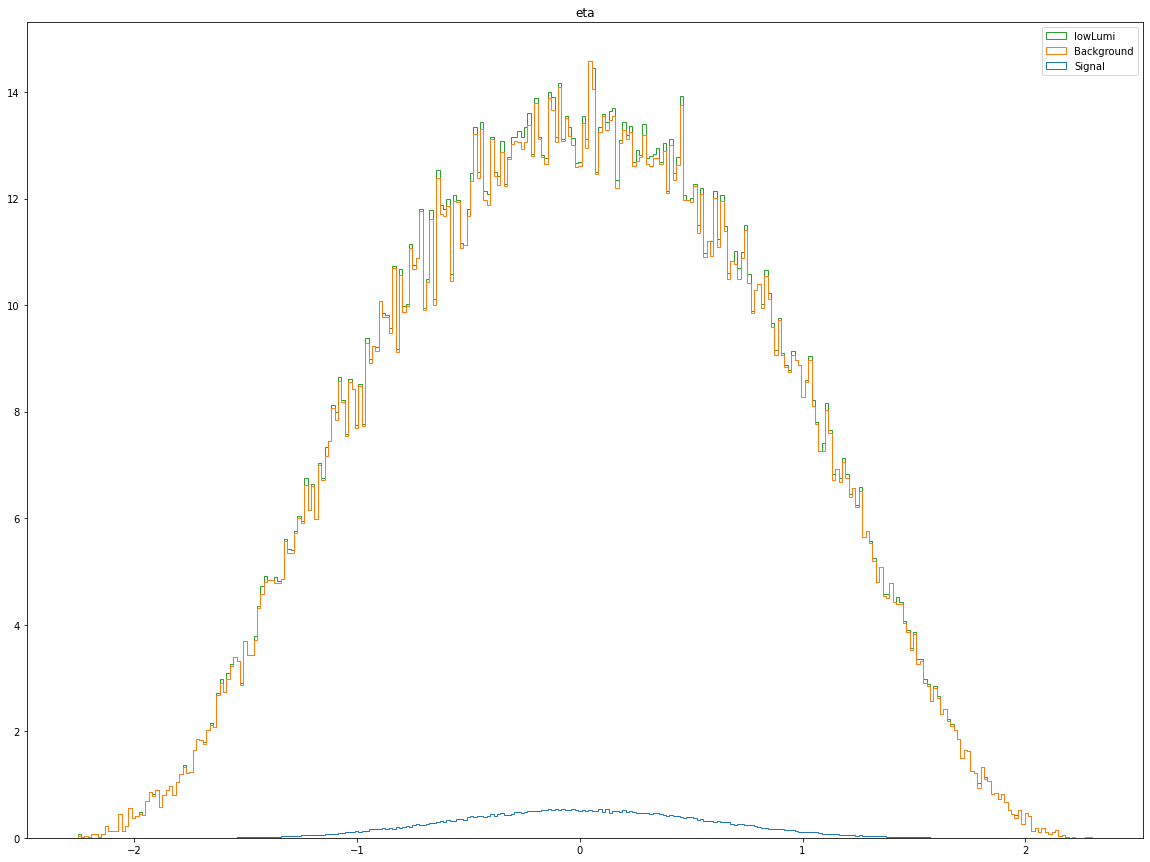

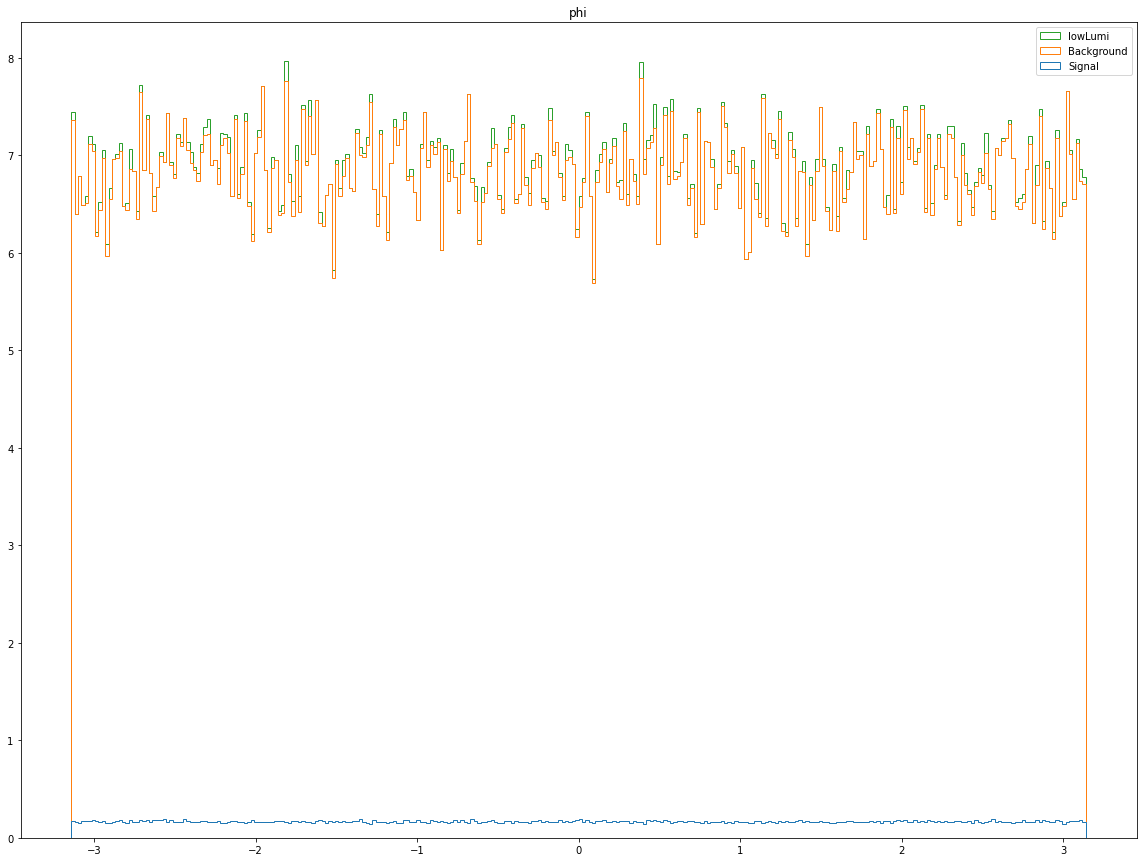

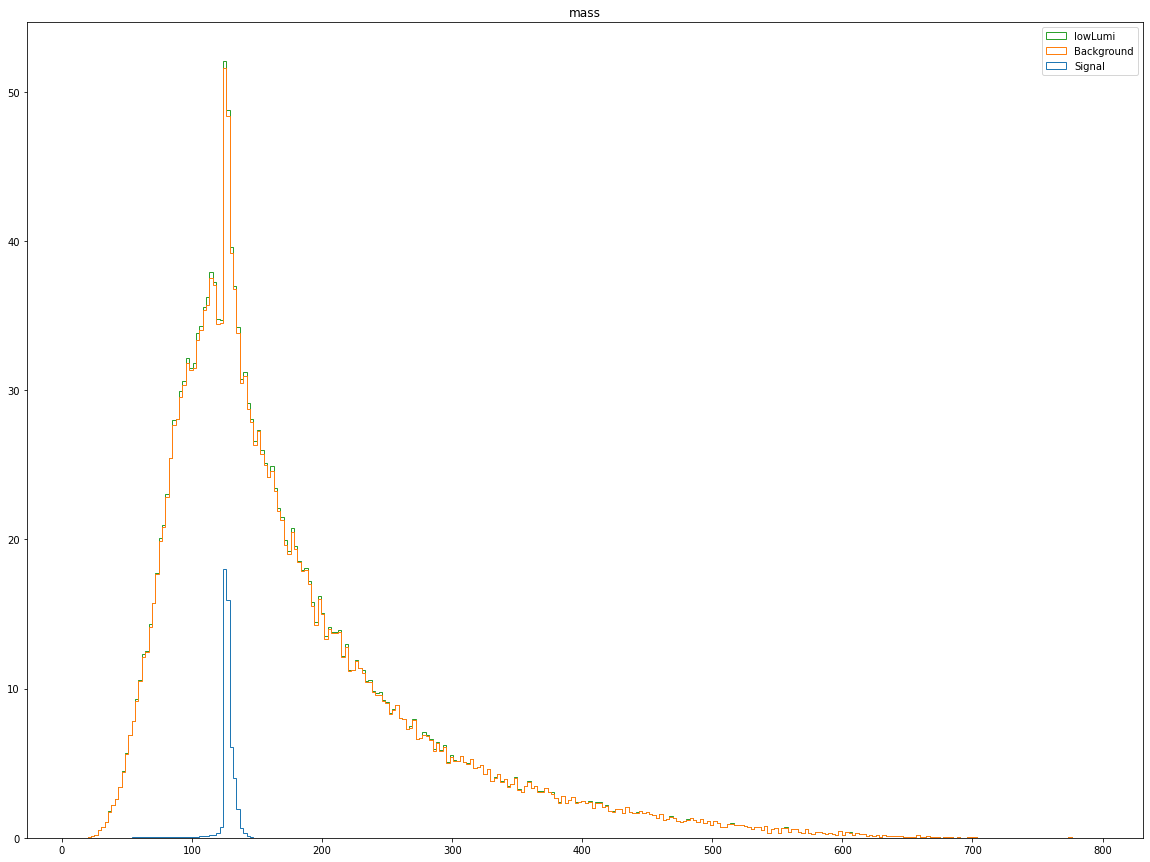

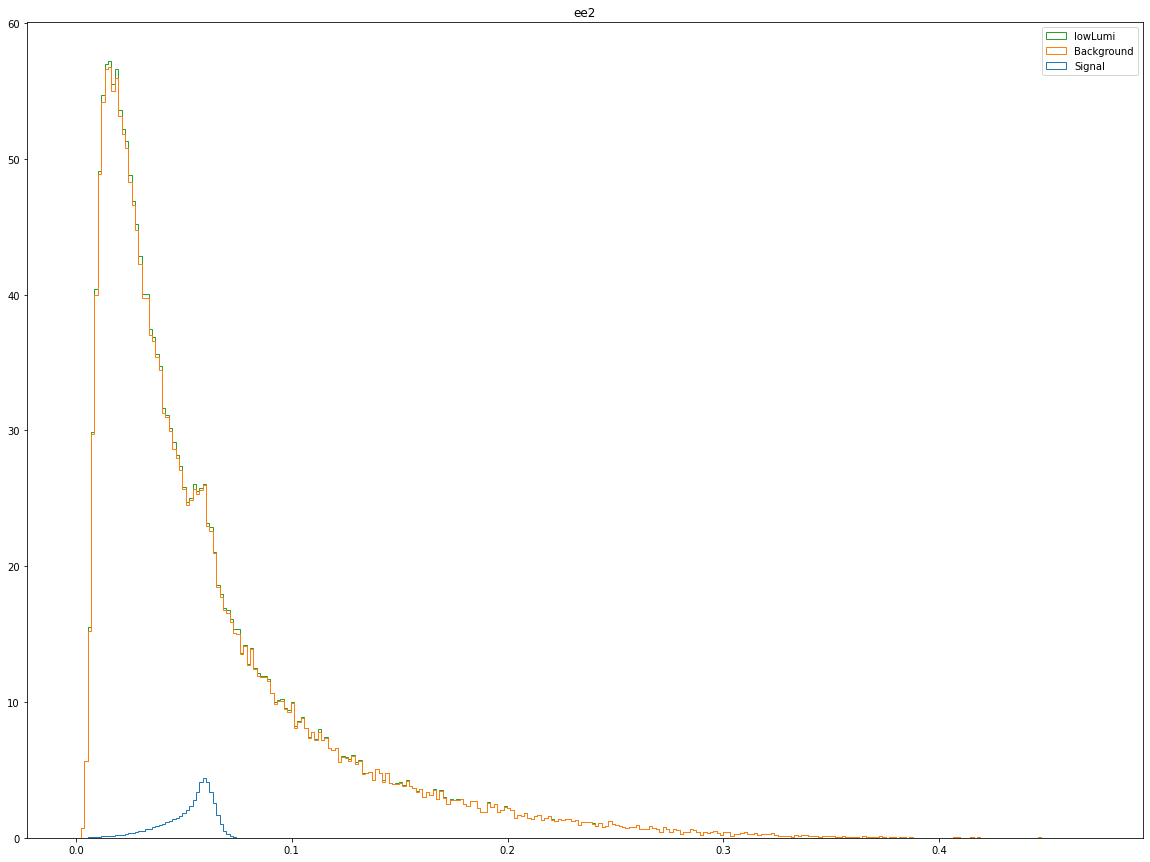

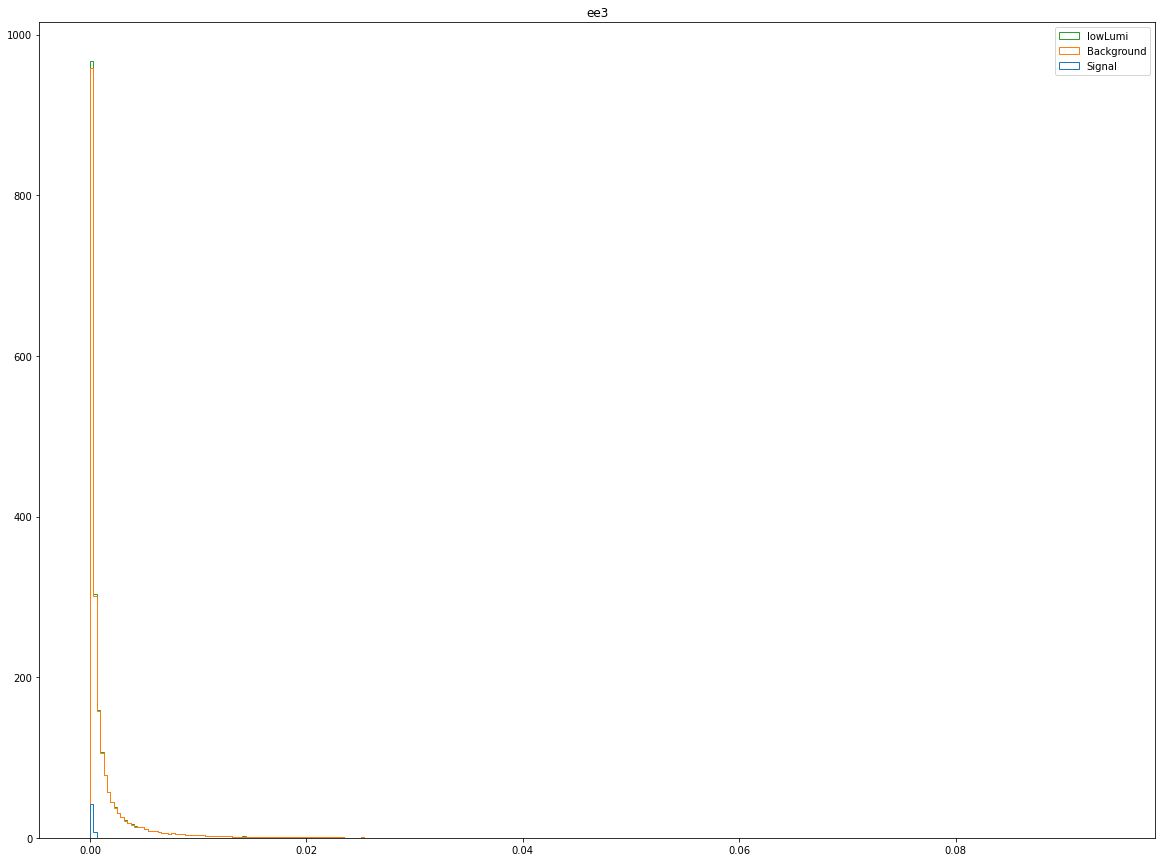

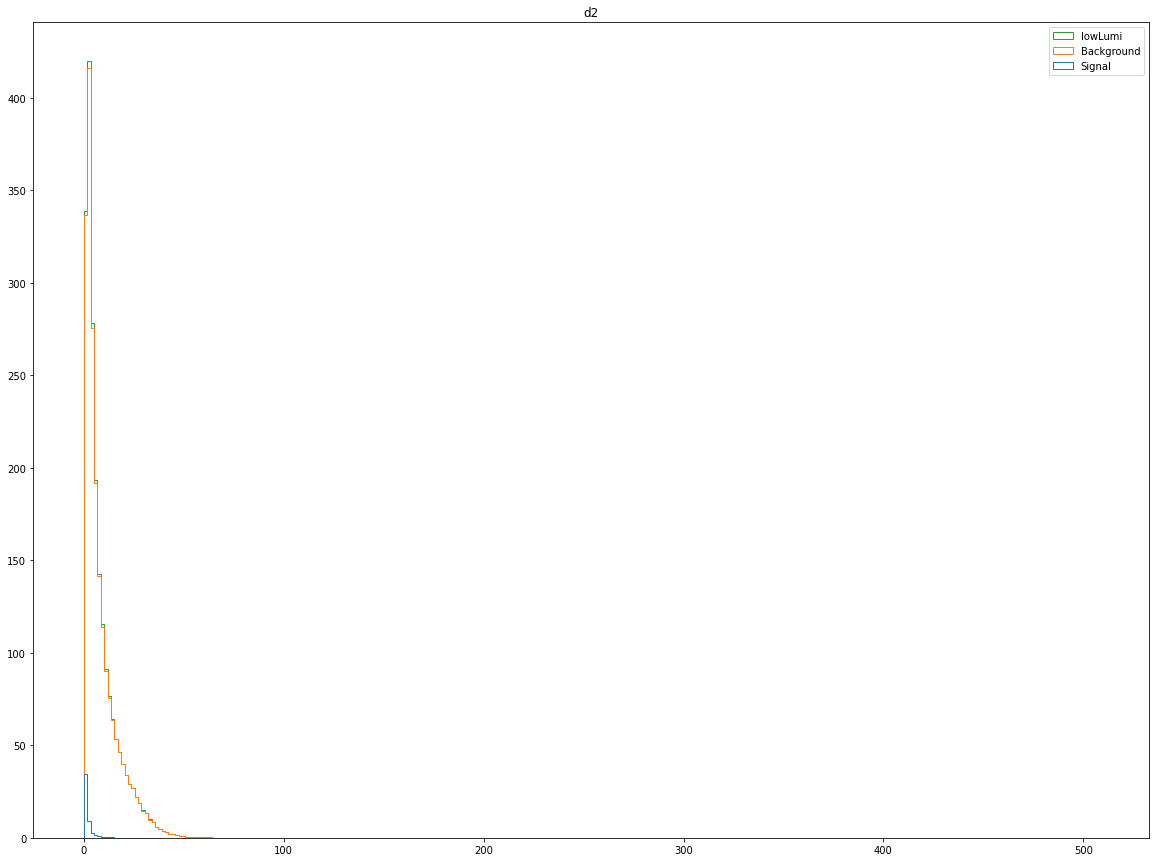

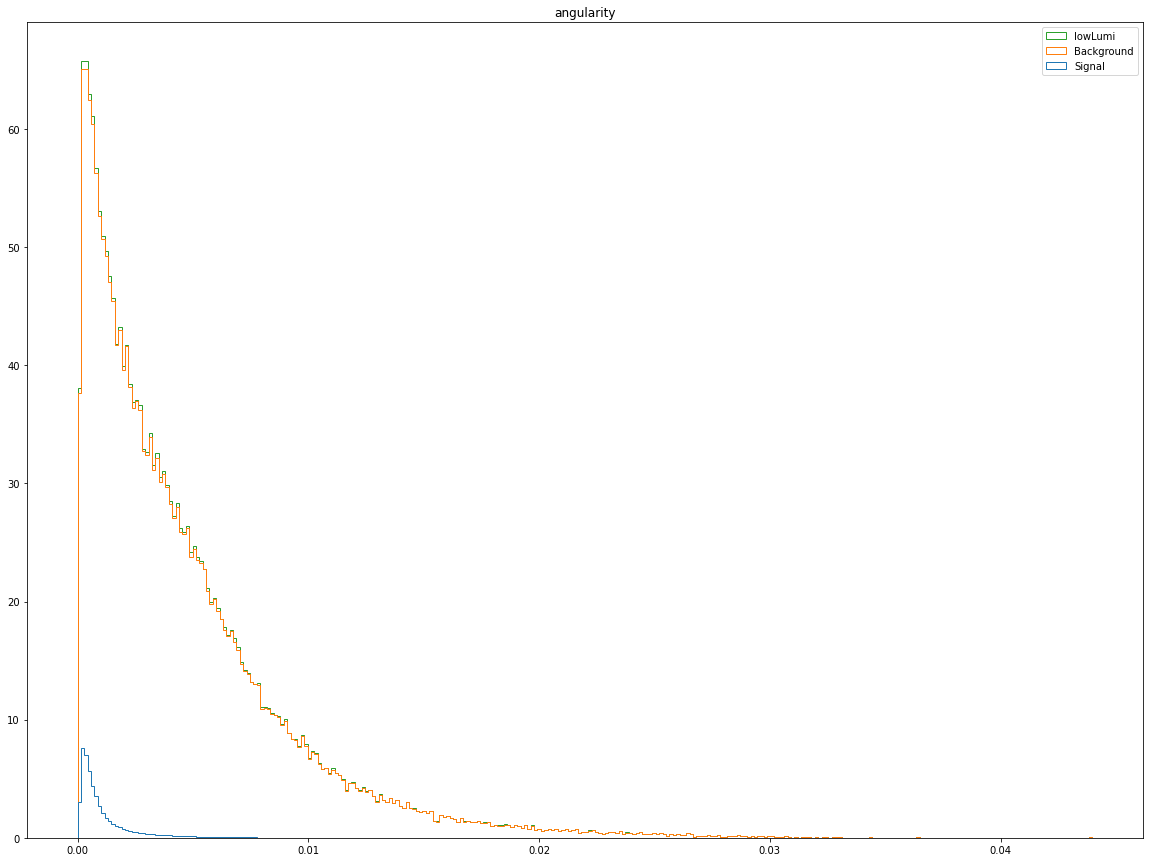

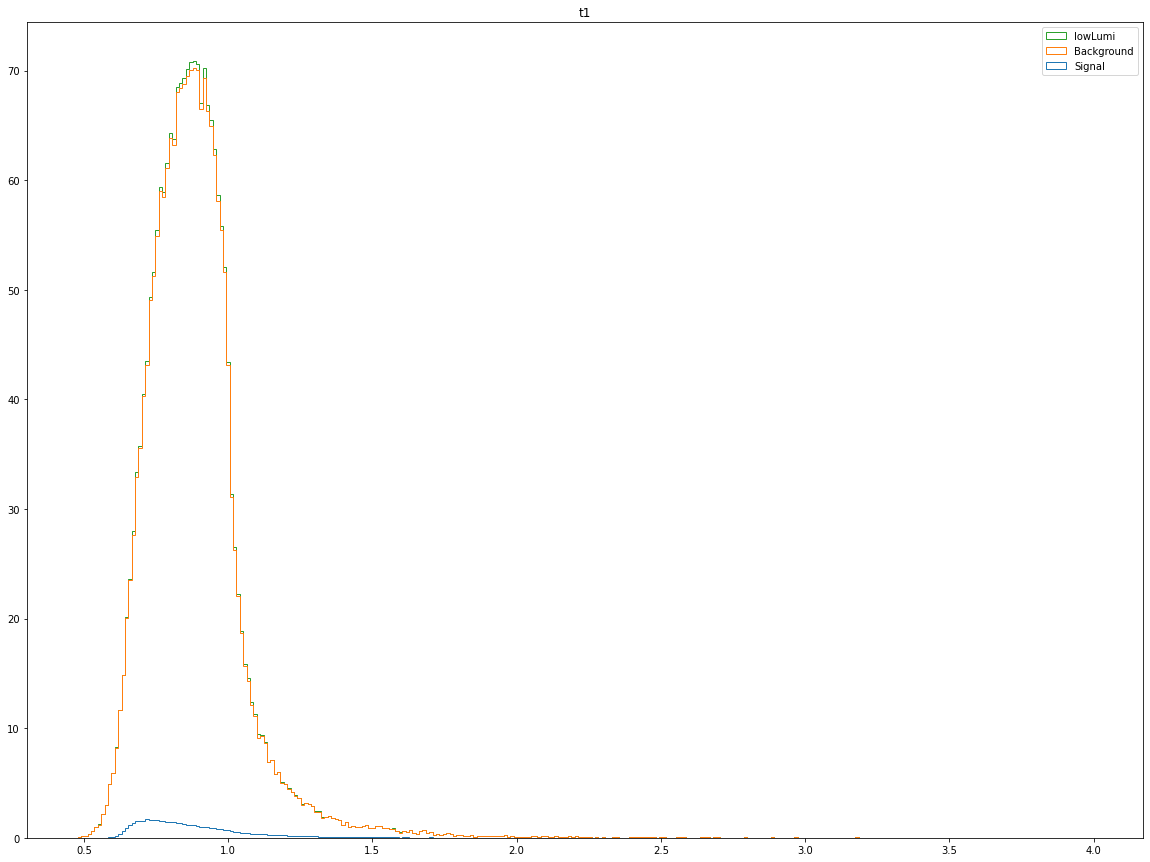

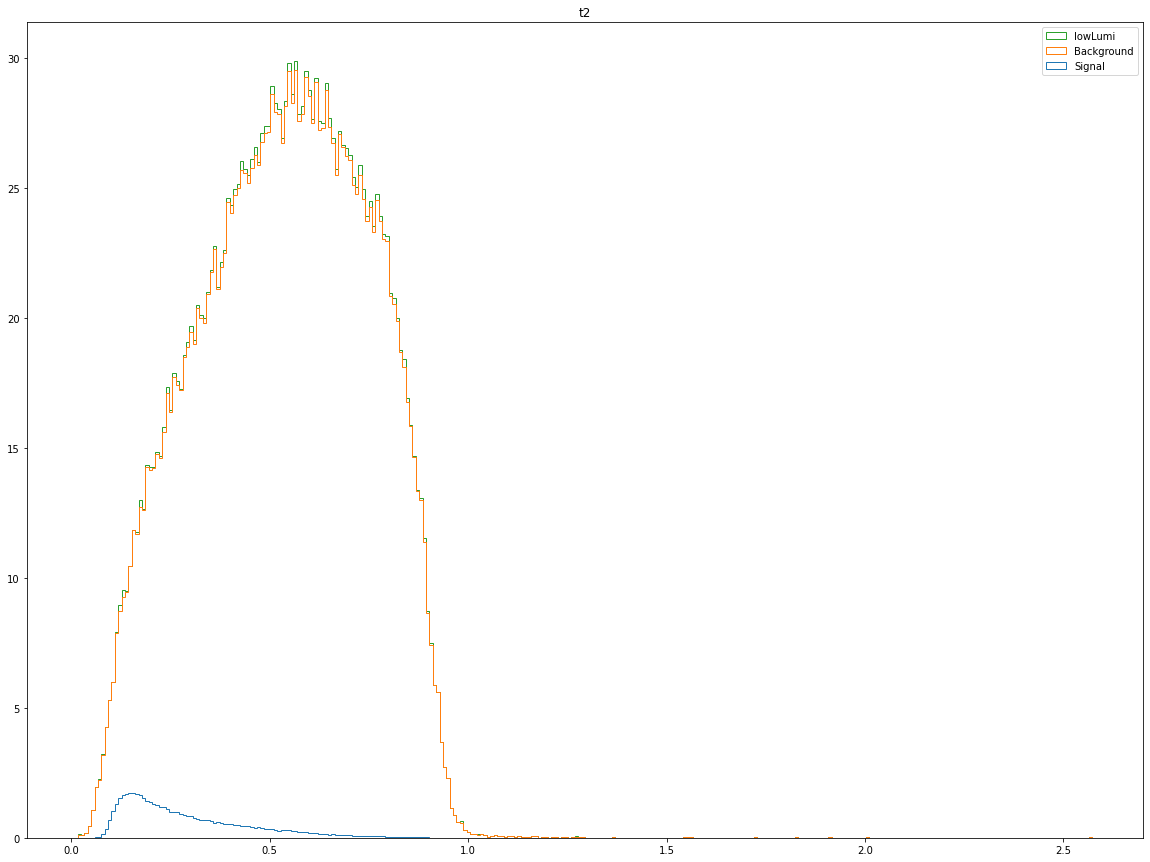

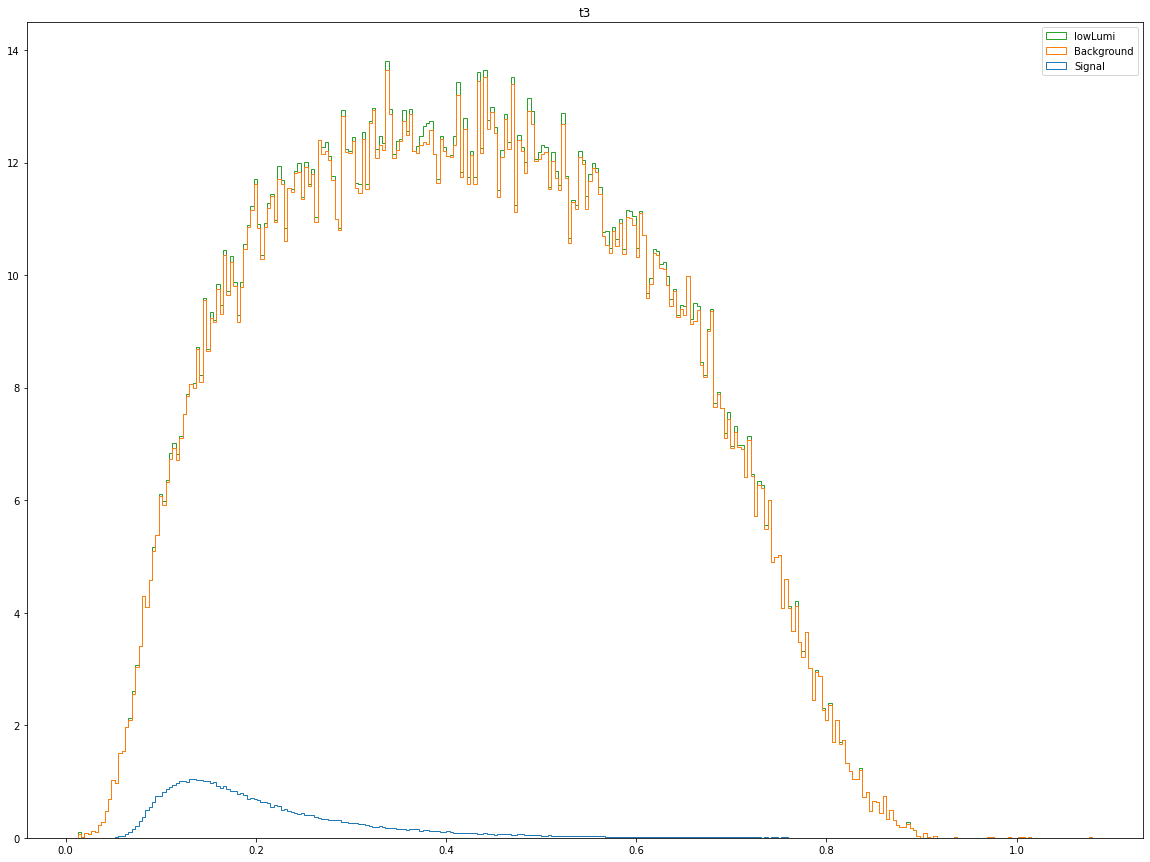

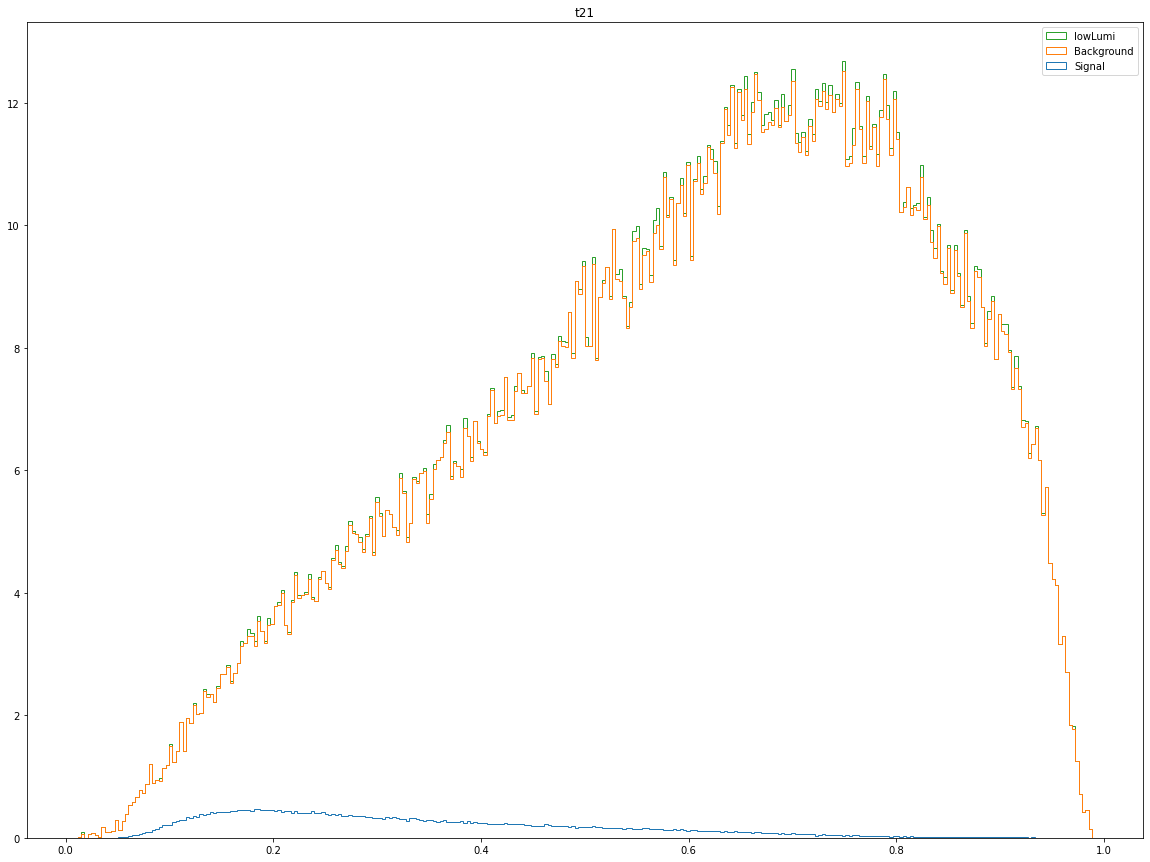

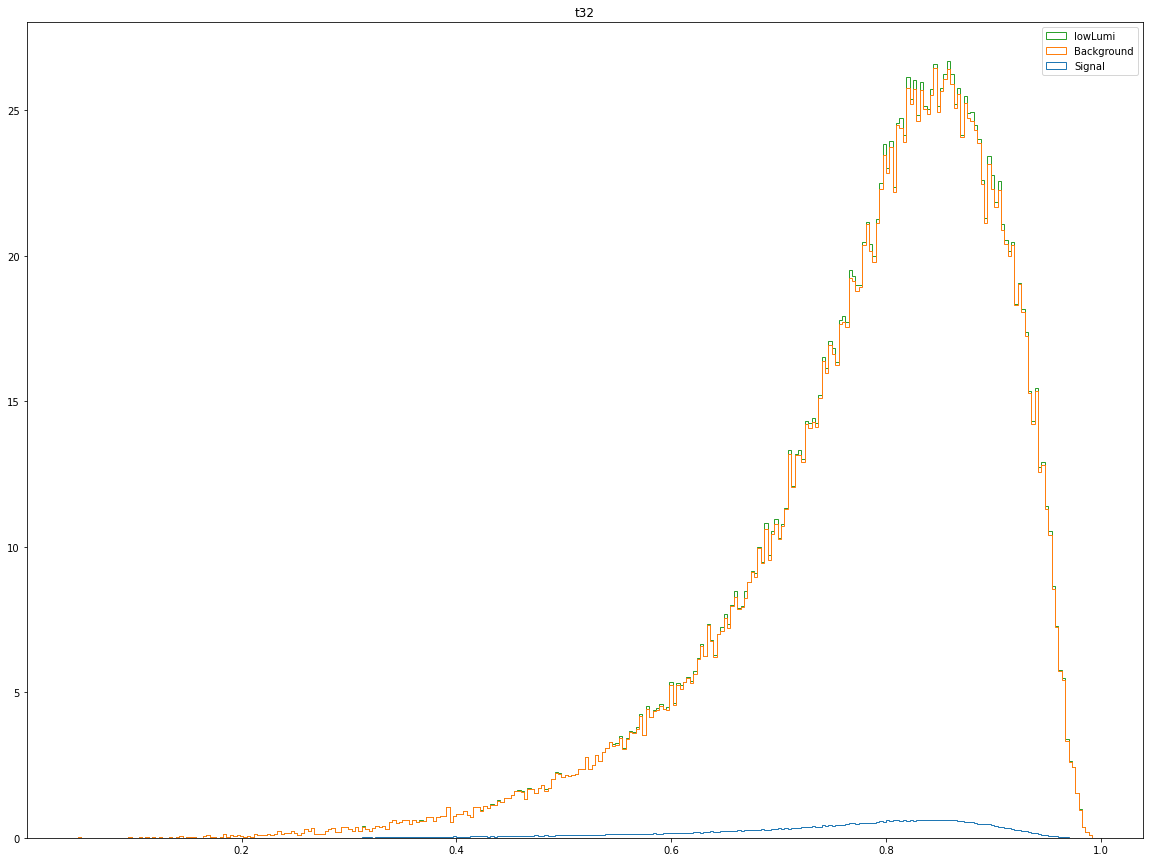

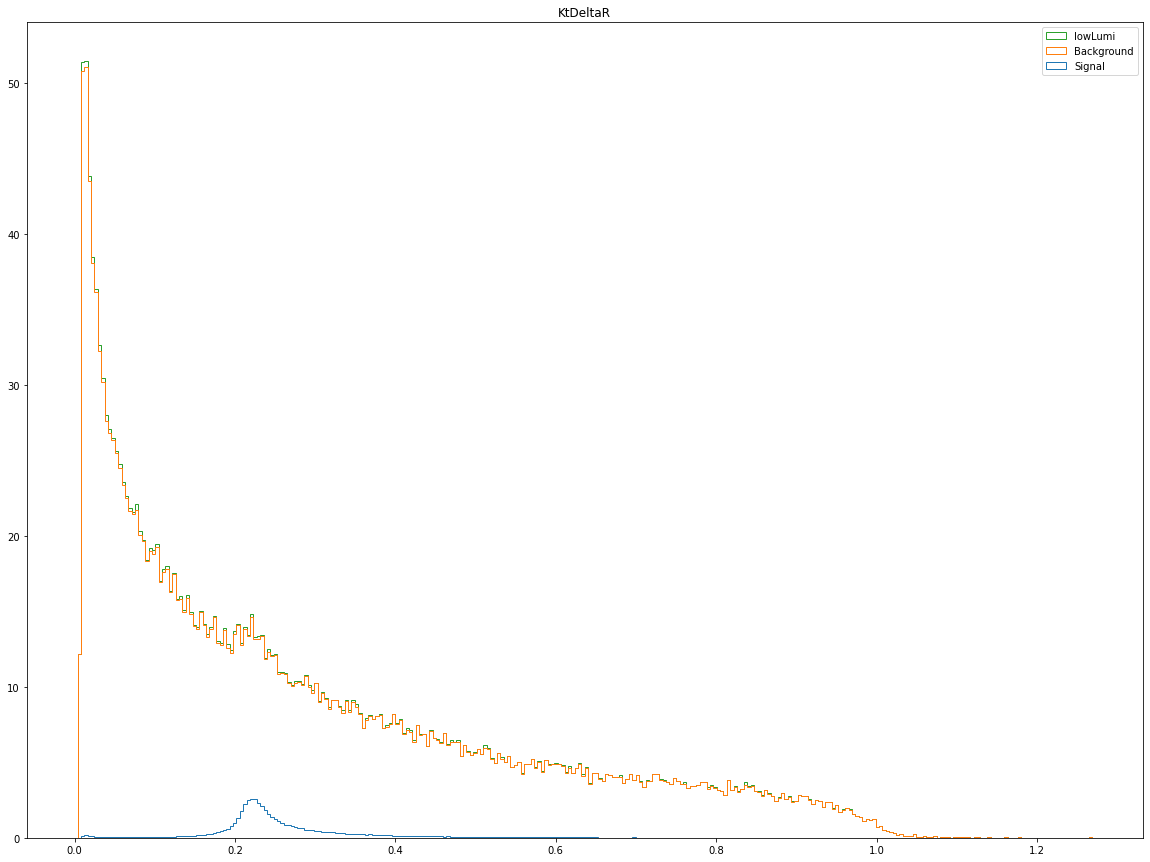

In [40]:
def plotWithoutCuts(key):
    x= [signal[key], background[key], lowLumi[key]]
    dataweights = [[.0005]*len(signal[key]), [.02]*len(background[key]), [.04]*len(lowLumi[key])]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background", "lowLumi"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithoutCuts(key)

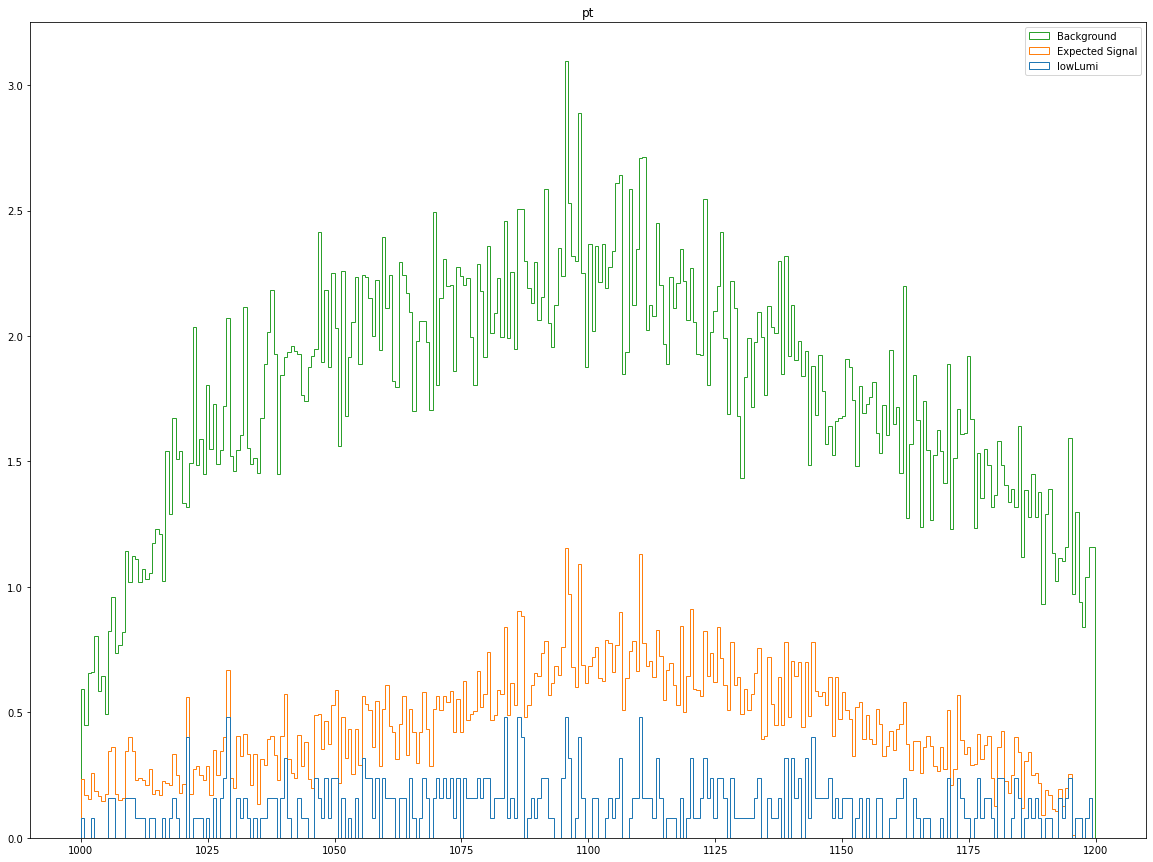

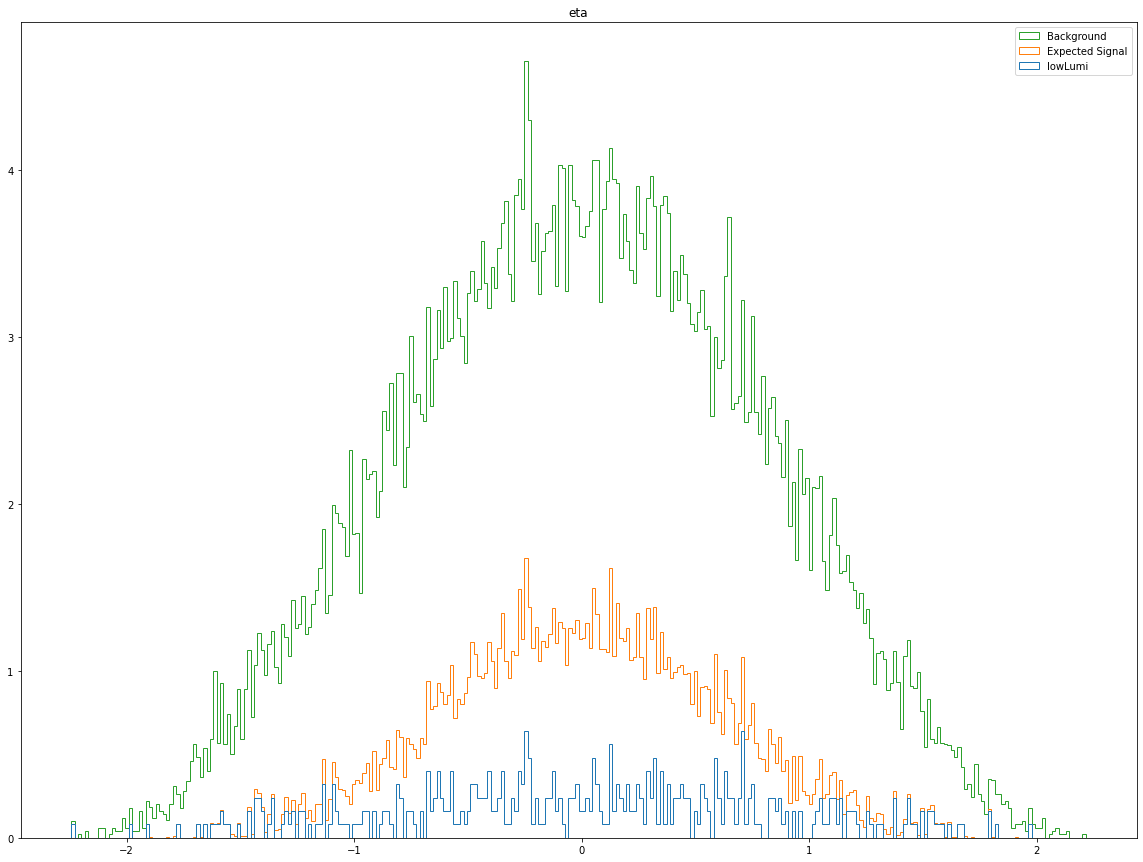

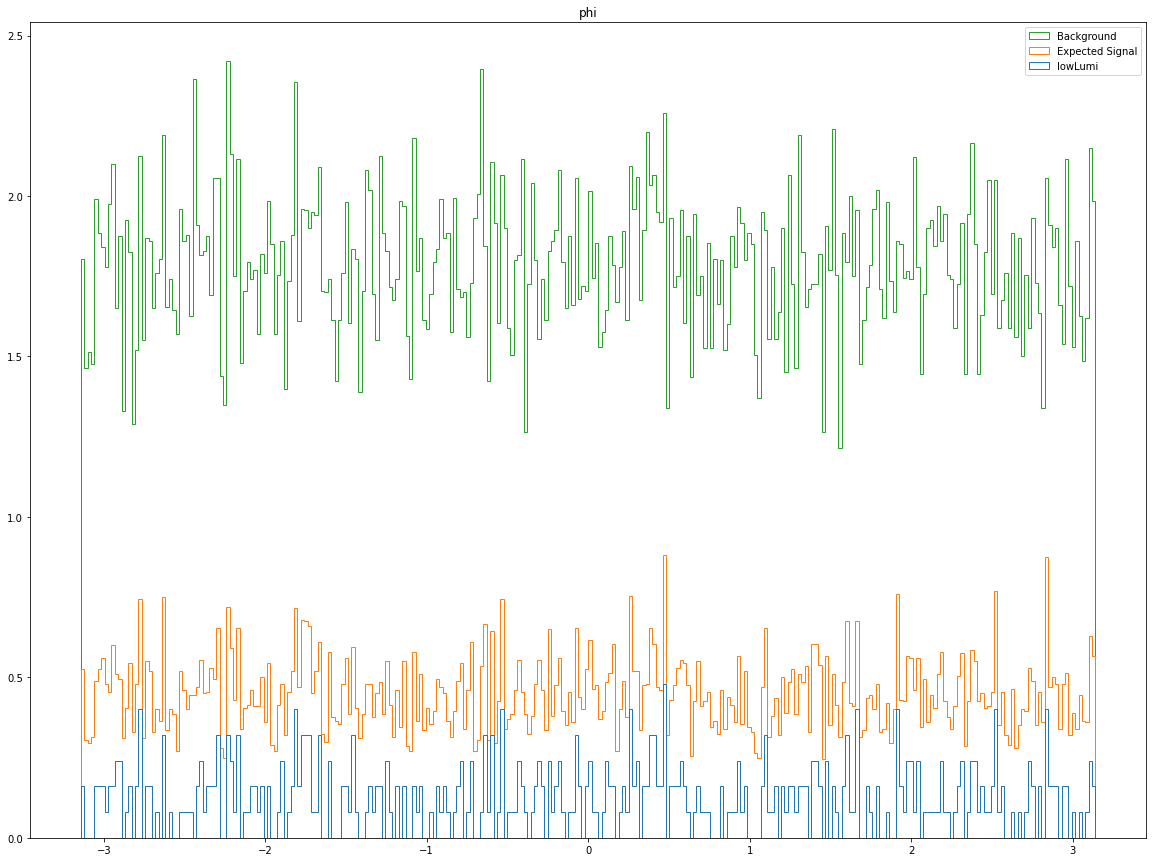

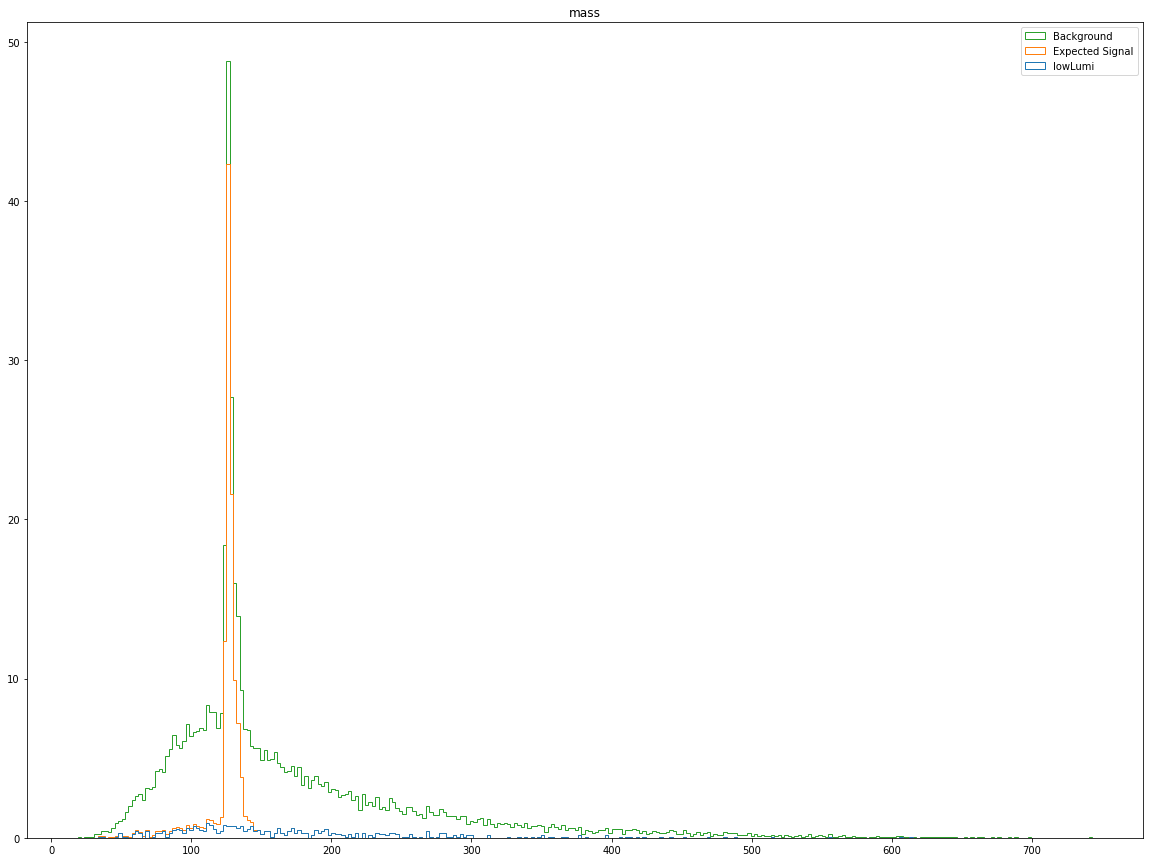

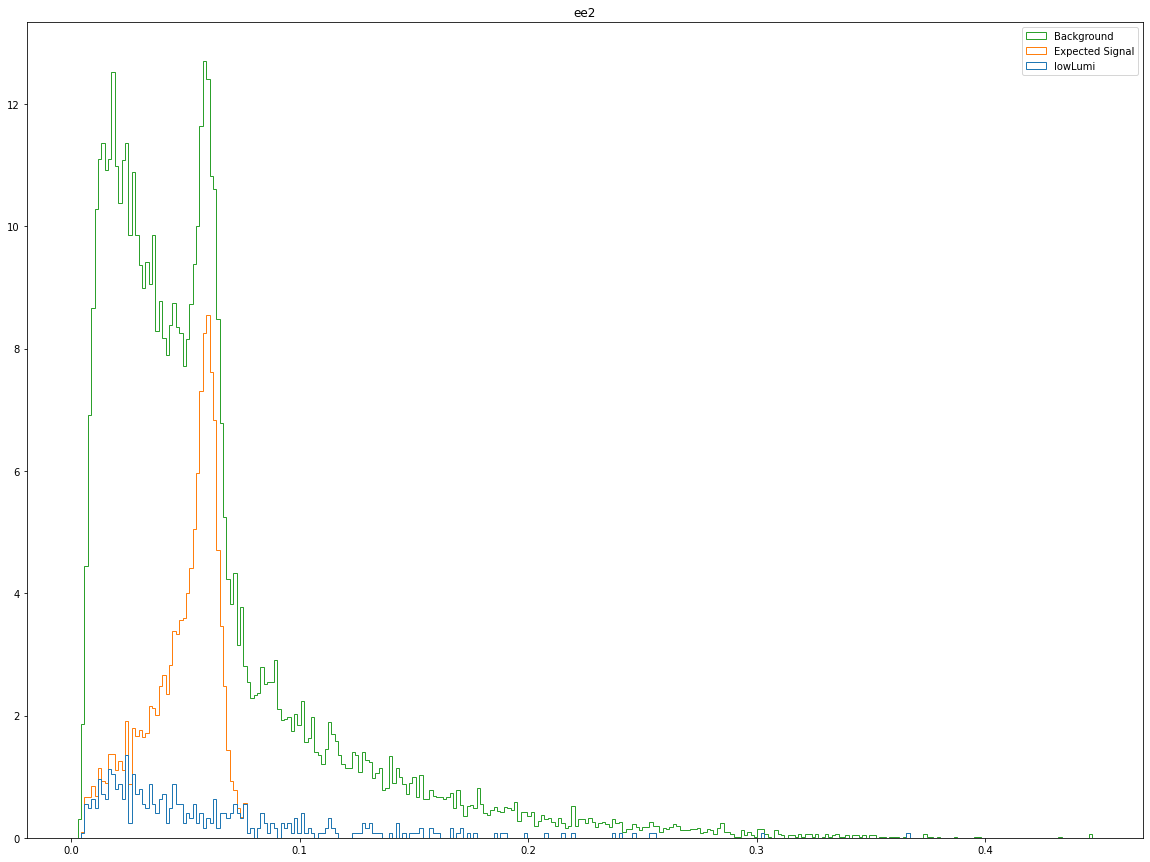

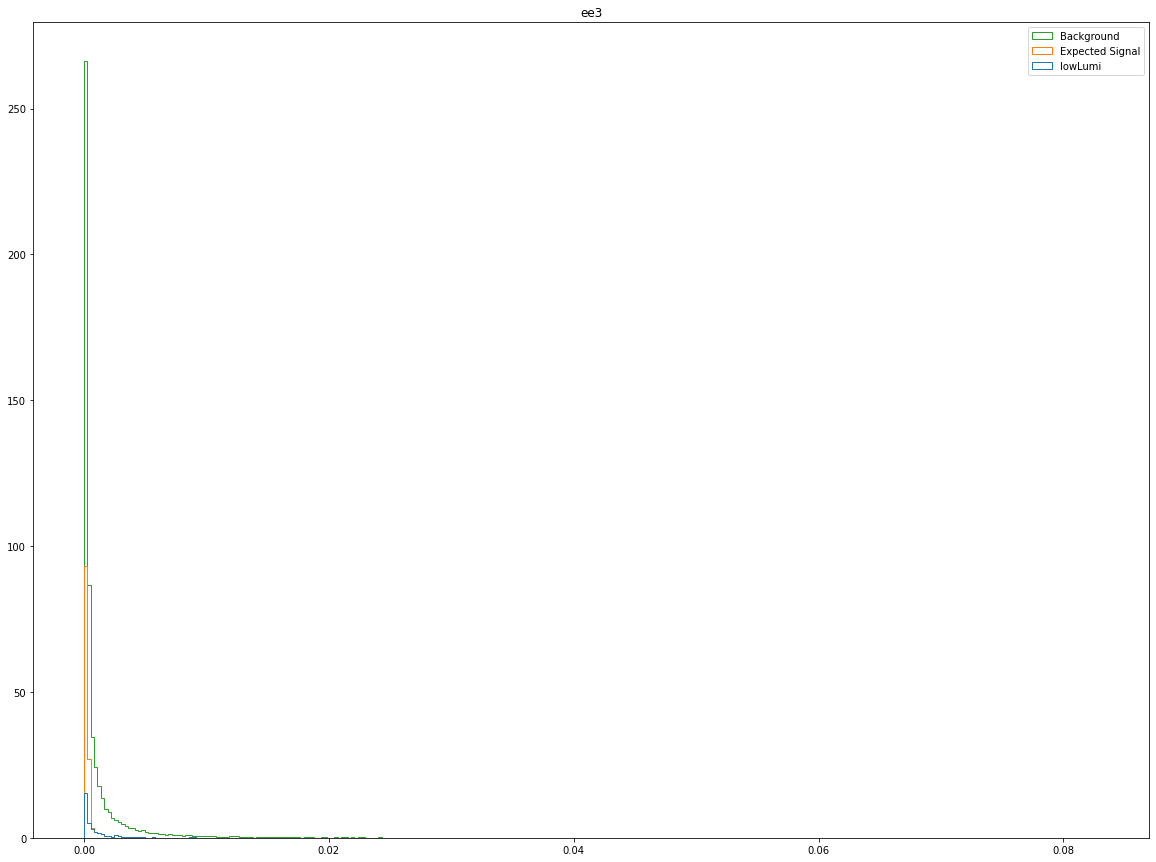

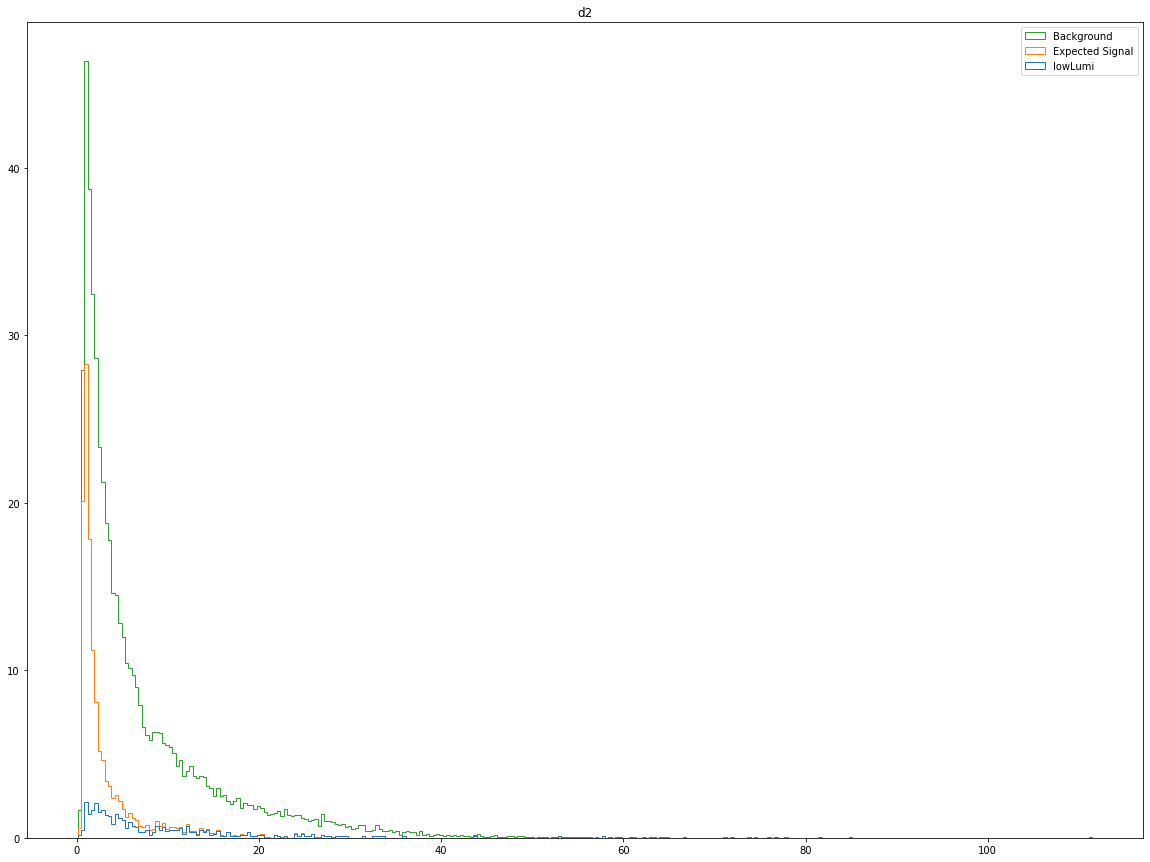

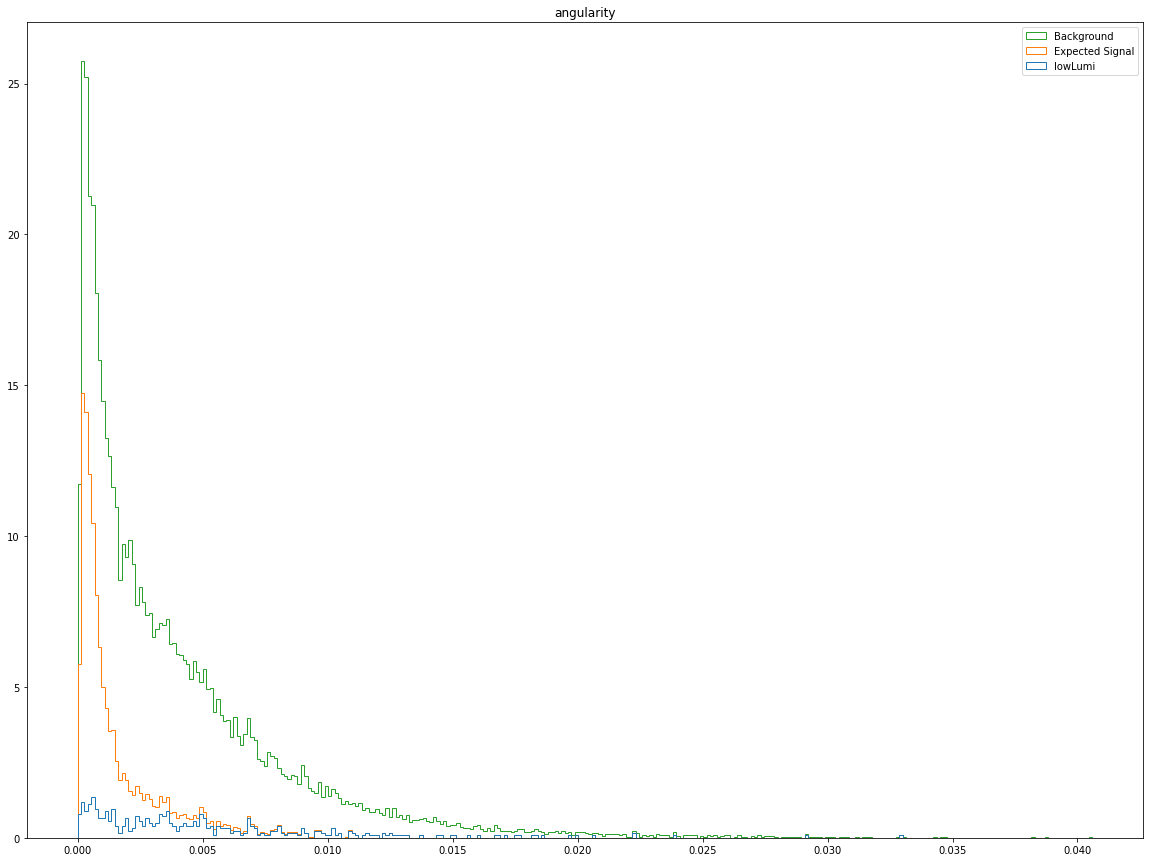

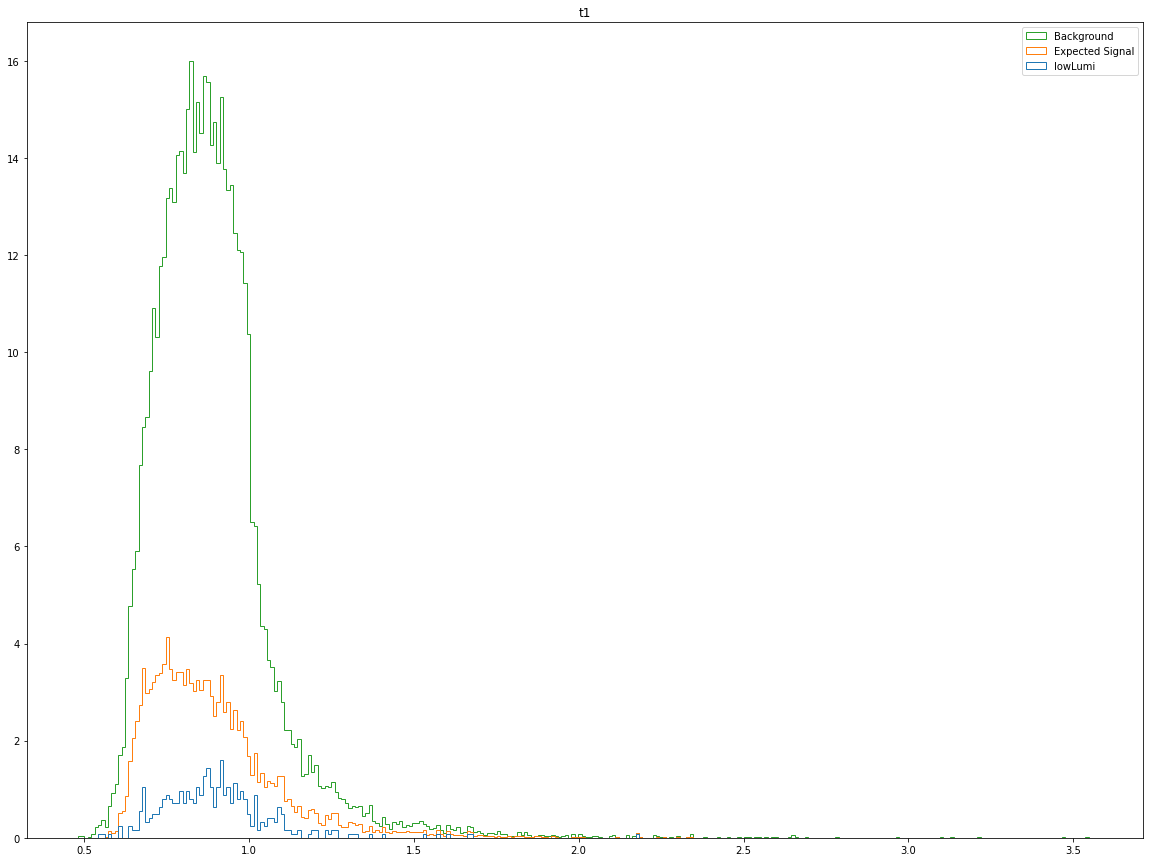

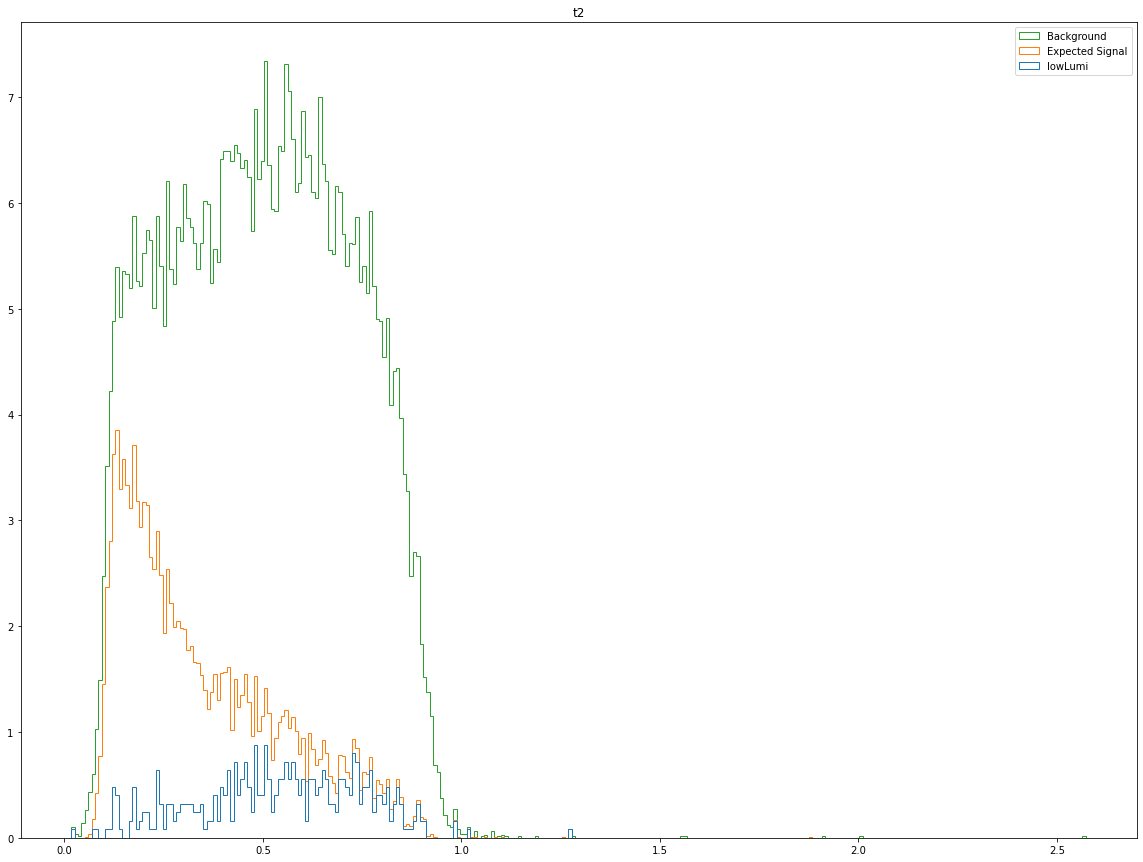

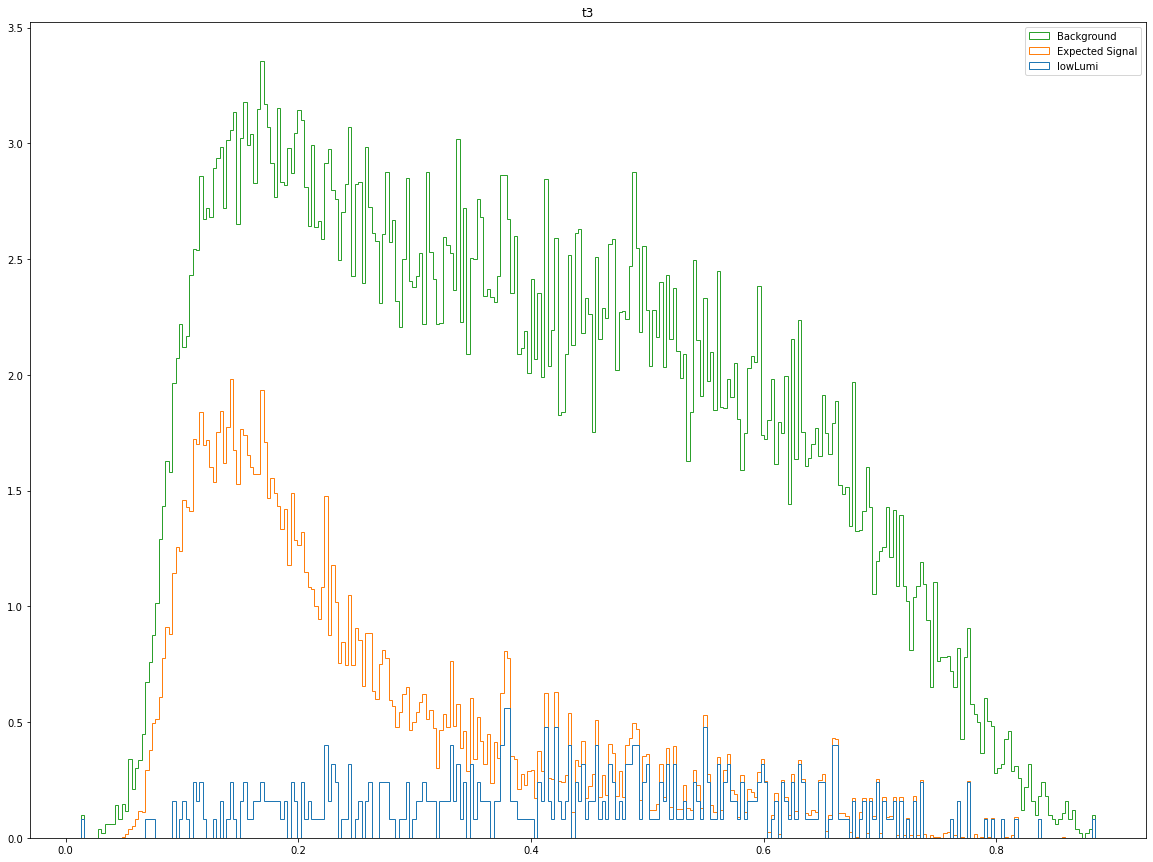

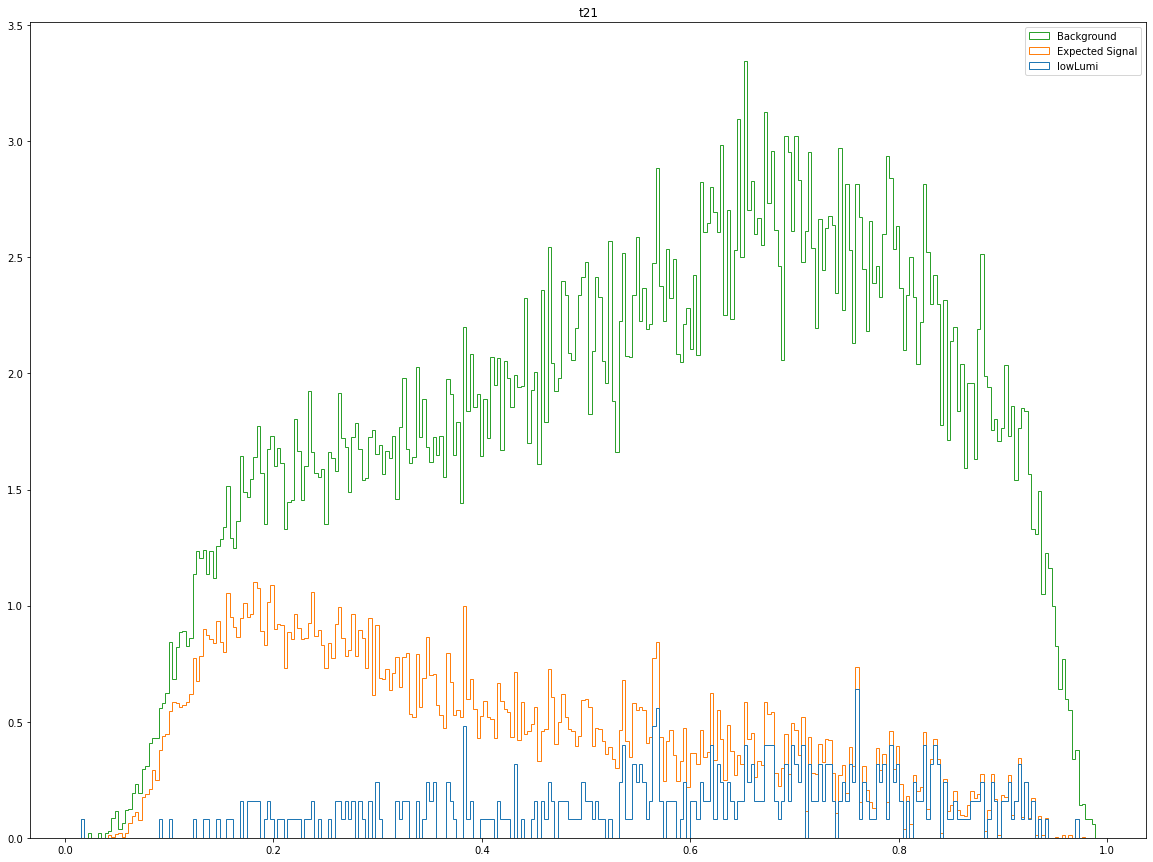

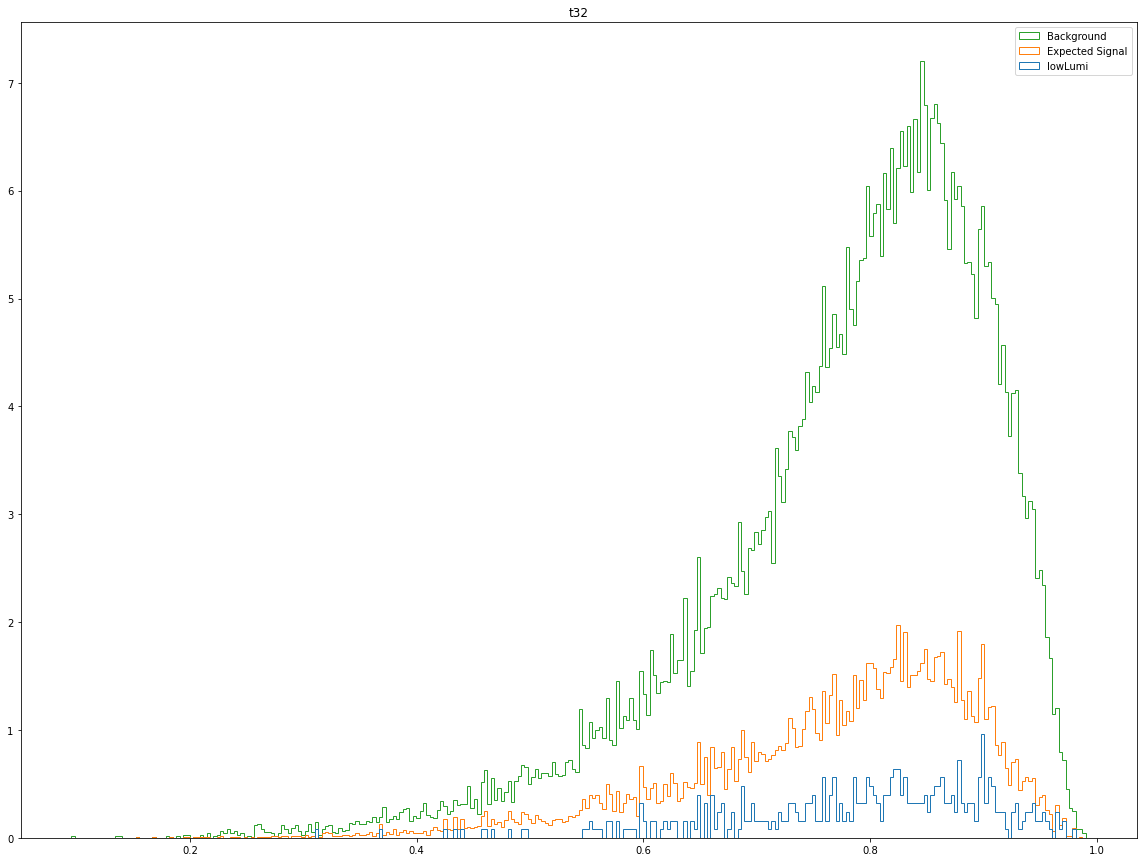

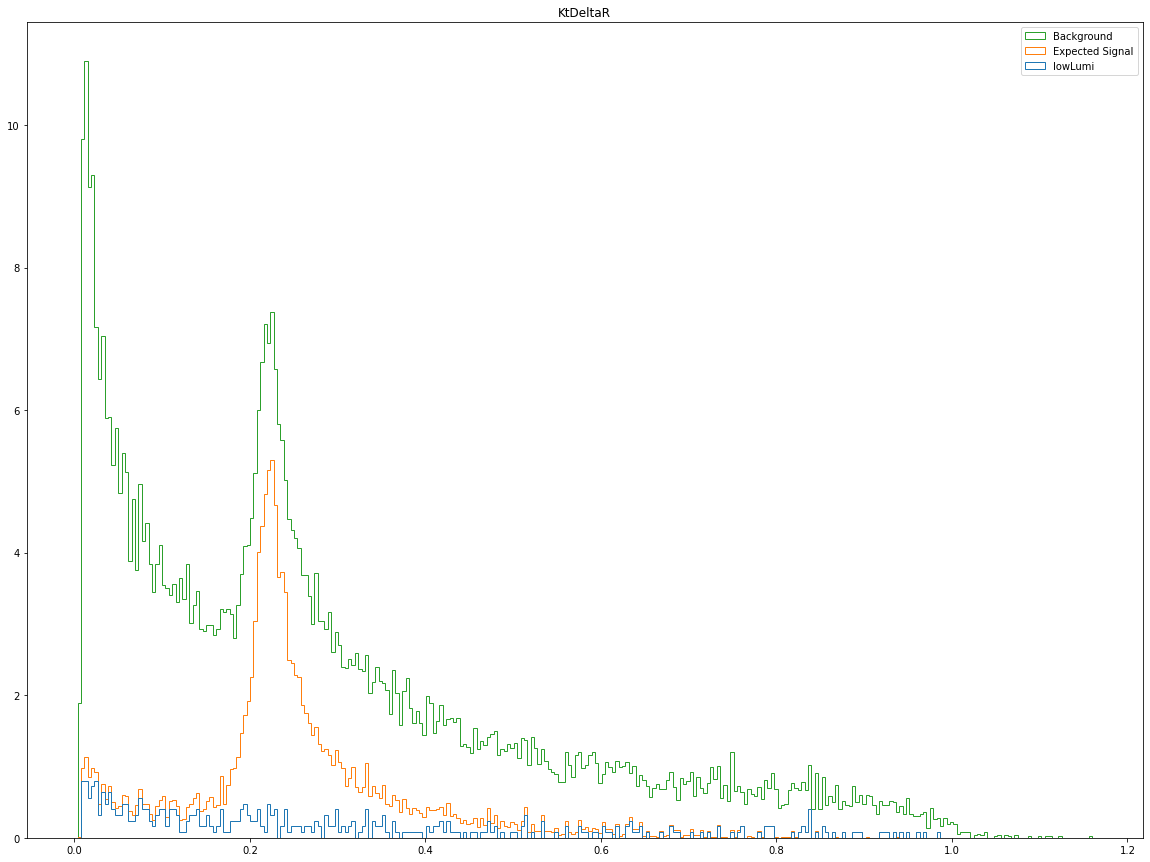

In [63]:
def plotWithCuts(key):
    signal_slice, exp_signal_slice, background_slice = slicer(0, 20000, key, lowLumi, background, signal)
    x= [signal_slice, exp_signal_slice, background_slice]
    dataweights = [[.08]*len(signal_slice), [.005]*len(exp_signal_slice), [.02]*len(background_slice)]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("lowLumi", "Expected Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithCuts(key)

#### 3. 95% Confidence Level of signal yields

In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.

Evaluate the expected 95% confidence level upper limit

Evaluate the observed 95% confidence level upper limit

Compare expectation to observation. Comment on your finding.

In [53]:
signal_Conf = stats.norm.interval(alpha=0.95, loc=np.mean(signal['mass']), scale=stats.sem(signal['mass']))
lowLumi_Conf = stats.norm.interval(alpha=0.95, loc=np.mean(lowLumi['mass']), scale=stats.sem(lowLumi['mass']))
print("Signal Conf =", signal_Conf, "Low Lumi Conf =", lowLumi_Conf)

Signal Conf = (126.6117199195397, 126.71594453000736) Low Lumi Conf = (162.5453490495895, 179.71975989232567)


In [28]:
n = 10000000
plt.rcParams["figure.figsize"] = (10,8)
bg_exp = stats.poisson.rvs(lam, size = n)

signals = np.random.randint(0, 200, n)

datanew = bg_exp + signals

dataedges = np.linspace(0,350,351)
signaledges = np.linspace(0,200,201)

Psd, temp, temp2 = np.histogram2d(datanew, signals, bins=(dataedges, signaledges), density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

The expected 95.0% upper limit is 61.


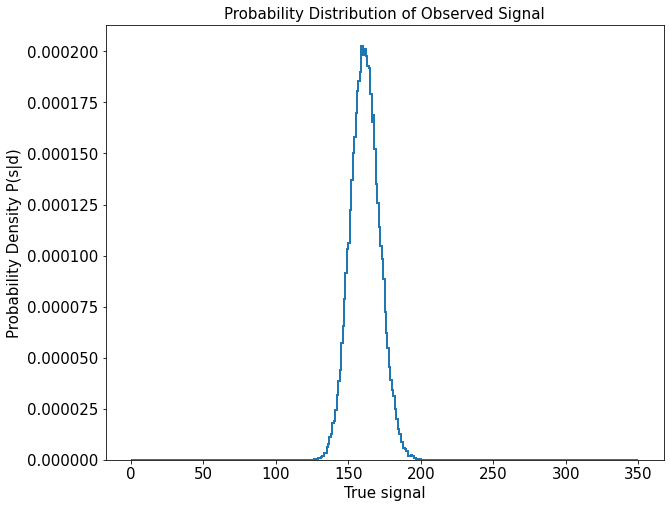

In [29]:
limit = 0.95
prob = 0
signal = 0

for i in range (0,350):
    prob_signal = Psd[:,signal]
    prob_signal = prob_signal*(1/(np.sum(prob_signal)))

    for j in range (145, len(prob_signal)):
        prob += prob_signal[j]   
    if prob >= limit:
        break
    
    prob = 0       
    signal += 1
    
print(f'The expected {limit*100}% upper limit is {signal}.')
plt.stairs(Psd[:, signal], edges = dataedges, linewidth = 2)
plt.title(f'Probability Distribution of Observed Signal', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability Density P(s|d)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.show()

Here, the graph is demonstrating that with a signal of 61, there's a 95% chance of observing 145 events or more. If this signal were stronger than 61, it would mean we would be observing a true Higgs signal 95% of the time.

The observed 95.0%  upper limit is 0.


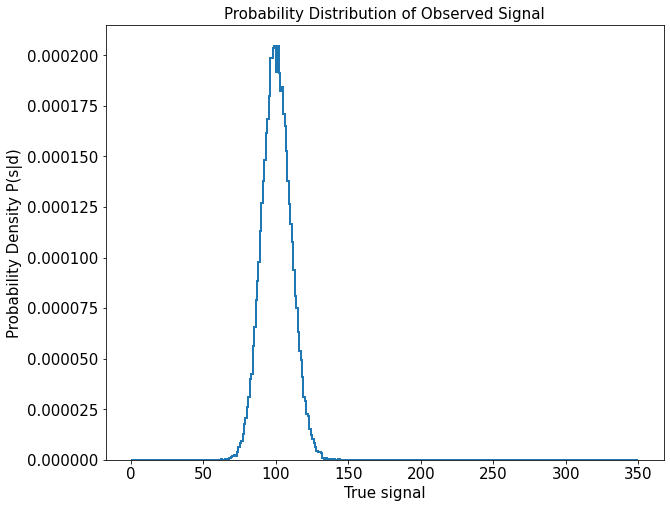

In [30]:
limit = 0.95
prob = 0
signal = 0

for i in range (0,350):
    prob_signal = Psd[:,signal]
    prob_signal = prob_signal*(1/(np.sum(prob_signal)))

    for j in range (24, len(prob_signal)):
        prob += prob_signal[j]
    if prob >= limit:
        break
    
    prob = 0      
    signal += 1
    
print(f'The observed {limit*100}%  upper limit is {signal}.')
plt.stairs(Psd[:, signal], edges = dataedges, linewidth = 2)
plt.title(f'Probability Distribution of Observed Signal', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability Density P(s|d)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.show()

A true signal in this context would give us a Higgs signal more than 95% of the time, which must mean that there are no detectable Higgs signals within the low luminosity data.

#### 4. Bonus:

Evalute the 1σ  uncertainty of the expected 95% confidence level upper limit.

In [62]:
print(lowLumi_Conf[1])
cdf = scipy.stats.poisson.cdf(background['mass'] + lowLumi['mass'], lowLumi_Conf[1])
lower = 1
upper = 2
print('Significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(cdf),lower,upper))

179.71975989232567


TypeError: unsupported format string passed to numpy.ndarray.__format__